In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Description
#### This dataset contains job postings information with the following columns:

* job_title: The title or position name of the job listing. It includes the specific job role or title, such as "Data Scientist" or "Software Engineer".
* company_name: The name of the company or organization offering the job. This includes both well-known companies and lesser-known organizations.
* job_type: The type of employment or job arrangement. Examples include "Full-time", "Part-time", "Contract", or "Internship".
* exp_level: The required or preferred level of experience for the job. Typical categories are "Entry Level", "Mid Level", "Senior Level", etc.
* exp_years: The number of years of experience required for the job. This column contains categorical data indicating ranges of experience, such as "1 - 3 Yrs of Exp". Note that some entries may be missing.
* skills: A description of the skills and qualifications necessary for the job. This may include technical skills, certifications, and other competencies relevant to the job role.
* posted: The date or time frame when the job listing was posted or became active. This column includes information such as " 18 hours ago", "2 days ago".
* area: The specific area or region where the job is located.
* city: The city where the job is located. 
* country: The country where the job is located. 
* job_state: The current state or status of the job (e.g., open, closed). 
* job_category: The broader category of the job title after mapping specific job titles to broader categories. 


In [2]:
# reading the file
df=pd.read_csv("WUZZUF_finall.csv")

In [3]:
#explore the data
df.head()

,Unnamed: 0,job_title,company_name,area,city,country,job_type,job_state,exp_level,exp_years,job_category,skills,posted
0,0,AI Data Science and Machine Learning Instructor,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,3 - 15 Yrs of Exp,Training/Instructor,Deep Learning Data Science Python Natural Lang...,10 days ago
1,1,Machine Learning Engineer,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,7 - 11 Yrs of Exp,IT/Software Development,Computer Science Programming Python TensorFlow...,16 days ago
2,2,Machine Learning Engineer,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,2 - 4 Yrs of Exp,IT/Software Development,Python ElasticSearch Machine Learning Web Deve...,1 month ago
3,3,Machine Learning Engineer,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,4 - 8 Yrs of Exp,R&D/Science,Computer Science Computer Vision Deep Learning...,2 months ago
4,4,Senior AI Engineer,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,3 - 5 Yrs of Exp,IT/Software Development,Computer Vision Machine Learning TensorFlow Py...,1 hour ago


In [4]:
# we noticed that there are data types need to be converted and skills , exp_years have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193 entries, 0 to 5192
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5193 non-null   int64 
 1   job_title     5193 non-null   object
 2   company_name  5193 non-null   object
 3   area          5193 non-null   object
 4   city          5193 non-null   object
 5   country       5193 non-null   object
 6   job_type      5193 non-null   object
 7   job_state     5193 non-null   object
 8   exp_level     5193 non-null   object
 9   exp_years     3004 non-null   object
 10  job_category  5193 non-null   object
 11  skills        5071 non-null   object
 12  posted        5193 non-null   object
dtypes: int64(1), object(12)
memory usage: 527.5+ KB


In [5]:
# unimportant column so i'll drop it
df.describe()

,Unnamed: 0
count,5193.000000
mean,2596.000000
std,1499.234305
min,0.000000
25%,1298.000000
50%,2596.000000
75%,3894.000000
max,5192.000000


In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.describe(include='O')
# we noticed that most of jos are of type full time
# half of jobs need to be experienced and on site

,job_title,company_name,area,city,country,job_type,job_state,exp_level,exp_years,job_category,skills,posted
count,5193,5193,5193,5193,5193,5193,5193,5193,3004,5193,5071,5193
unique,3206,1973,123,70,20,4,4,6,108,68,3922,74
top,Graphic Designer,Confidential,Not mentioned,Cairo,Egypt,Full Time,On-site,Experienced,3 - 5 Yrs of Exp,IT/Software Development,Administration Microsoft Office Admin Typing C...,2 months ago
freq,58,484,2469,2245,3407,4948,2771,2844,427,1186,142,769


In [8]:
df.isna().sum()/len(df) # 42% of skills is null we can drop it or impute it with KNN imputer

job_title       0.000000
company_name    0.000000
area            0.000000
city            0.000000
country         0.000000
job_type        0.000000
job_state       0.000000
exp_level       0.000000
exp_years       0.421529
job_category    0.000000
skills          0.023493
posted          0.000000
dtype: float64

In [9]:
df.duplicated().sum()

143

# Data Cleaning

## Job_name Column

In [10]:
df['job_title'].unique()[:150]
# i noticed that there are names that arn't clean so i'll split it and take the first element 
#like(Senior Graphic Designer / Video editor ( Full Time ) - Nasr City)

array(['AI Data Science and Machine Learning Instructor',
       'Machine Learning Engineer', 'Senior AI Engineer', 'AI Engineer',
       'Senior Developer - Enterprise Software',
       'Second Level Technical Support Engineer',
       'AI and Robotics Instructor', 'DevOps Engineer',
       'Graduate Internship: Enterprise Software Engineering',
       'AI Intern', 'Learning & Development Management Supervisor',
       'AI Engineer - Saudi Arabia', 'AI Engineer - UAE',
       'Senior Data Scientist - 1 year FTC - Saudi Arabia relocation',
       'Data Scientist', 'Junior Data Scientist (Remote)',
       'Python Data Scientist (Quantitative Finance)',
       'Jr. Data Scientist', 'AI Specialist',
       'Senior Cost Accountant (Manufacturing Industry)',
       'Injection intern', 'Mold intern', 'junior ML JD',
       'Full-Stack Python Team Leader (Django/React)',
       'Full-Stack Team Leader (Django/React)',
       'Senior Backend Developer', 'Cnc sheet metal maintenance engineer',


In [11]:
df['job_title']=df['job_title'].apply(lambda x: x.split(' - ')[0])
# split the name to extract the name of the jobs only

In [29]:
df['job_title'].unique()[100:200] # check it

array(['Public Relations Associate And Online Reputation Manager',
       'Software developer', 'Application Manager',
       'Senior Software Engineer, Team Leader, Fintech',
       'WordPress & Web design Video Tutorials and Content Creator',
       'Presales & Customer Engagement Manager, Fintech',
       'Real Estate Appointment Setter/Sales Agent', '3 D Designer',
       'Partner Success Supervisor / E-Learning Specialist (Online KSA)',
       'Junior Project Manager for eCommerce projects',
       'Tele Sales ( opening ) in field Real Estate Brokerage (Fluent in The Saudi Accent)',
       'Node Js Engineer', 'Full Stack Developer',
       'Senior Associate Consultant', 'Junior Web Developer/Cairo',
       'Junior Web Developer', 'Technical Project Manager | SCADA Aveva',
       'Associate Consultant', 'Sales Executive',
       'Junior Full-stack Developer (React.js + PHP)',
       'Junior Full-stack Developer (React.js + PHP)/Cairo',
       'Sales Account Manager',
       'Head o

i decided to reduce the job_category column from 68 unique values to 28 based on job_title column

In [35]:
import re

def categorize_job(job_title):
    job_title = job_title.lower()
    
    # AI and Machine Learning
    if any(keyword in job_title for keyword in ['ai', 'artificial intelligence', 'machine learning', 'ml'
                                                ,'computer vision','deep learning']):
        return 'AI and Machine Learning'
    
    # Data Science and Analytics
    elif any(keyword in job_title for keyword in ['data scientist', 'data analyst', 'analytics']):
        return 'Data Science and Analytics'
    
    # Software Engineering
    elif any(keyword in job_title for keyword in ['software', 'developer', 'engineer'
                                                  'backend','frontend', 'programming', 'coder',
                                                  'full-stack','java','flutter']):
        if 'senior' in job_title or 'lead' in job_title:
            return 'Senior Software Engineering'
        else:
            return 'Software Engineering'
    
    # DevOps and System Administration
    elif any(keyword in job_title for keyword in ['devops', 'system admin', 'aws', 'cloud']):
        return 'DevOps and System Administration'
    
    # Cybersecurity
    elif 'security' in job_title:
        return 'Cybersecurity'
    
    # Management and Leadership
    elif any(keyword in job_title for keyword in ['manager', 'director', 'lead', 'supervisor']):
        return 'Management and Leadership'
    
    # Sales and Marketing
    elif any(keyword in job_title for keyword in ['sales', 'marketing', 'business development','media']):
        return 'Sales and Marketing'
    
    # Design and Creative
    elif any(keyword in job_title for keyword in ['designer', 'creative', 'art', 'content','ui/ux','ui ux','ui','3 d'
                                                  ,'animator','3d','editor','video']):
        return 'Design and Creative'
    
    # Education and Training
    elif any(keyword in job_title for keyword in ['instructor', 'teacher', 'trainer', 'learning']):
        return 'Education and Training'
    
    # Customer Service
    elif any(keyword in job_title for keyword in ['customer', 'support']):
        return 'Customer Service'
    
    # Finance and Accounting
    elif any(keyword in job_title for keyword in ['finance', 'account', 'cost']):
        return 'Finance and Accounting'
    
    # Production and Manufacturing
    elif any(keyword in job_title for keyword in ['production', 'manufacturing', 'cnc', 'injection']):
        return 'Production and Manufacturing'
    
    # Quality Assurance
    elif any(keyword in job_title for keyword in ['quality', 'qa', 'qc']):
        return 'Quality Assurance'
    
    # Administrative
    elif any(keyword in job_title for keyword in ['admin', 'assistant', 'coordinator']):
        return 'Administrative'
    
    # Internship
    elif 'intern' in job_title:
        return 'Internship'
    
    #HR Professional
    elif any(keyword in job_title for keyword in ['hr manager', 'human resources', 
                                                  'hr','hr specialist','hr coordinator',
                                                 'hr administrator','hr specialist',
                                                 'Recruitment Specialist','Talent Acquisition',
                                                 'personnel specialist']):
        return 'HR Professional'
    
    #Data Entry
    elif any(keyword in job_title for keyword in ['entry-level','data entry']):
        return 'Data Entry'
    
    #IT Professional
    elif any(keyword in job_title for keyword in ['it','system administrator']):
        return 'IT Professional'
    
    #Testing
    elif any(keyword in job_title for keyword in ['system analyst','tester','test']):
        return 'Testing'
    
    #Data Engineer
    elif any(keyword in job_title for keyword in ['data engineer','warehouse']):
        return 'Data Engineer'
    
    
    #Research and Development
    elif any(keyword in job_title for keyword in ['r&d', 'research and development', 'researcher']):
        return 'Research and Development'
    
    #Project Management
    elif any(keyword in job_title for keyword in ['project manager', 'project lead']):
        return 'Project Management'
    
    #Public Relations
    elif any(keyword in job_title for keyword in ['public relations', 'pr']):
        return 'Public Relations'
    
    #Healthcare and Medical
    elif any(keyword in job_title for keyword in ['nurse', 'doctor', 'physician', 'healthcare', 'medical']):
        return 'Healthcare and Medical'
    
    #Logistics and Supply Chain
    elif any(keyword in job_title for keyword in ['logistics', 'supply chain', 'transport', 'shipping']):
        return 'Logistics and Supply Chain'
    
    #Technical Support
    elif any(keyword in job_title for keyword in ['technical support', 'tech support', 'support engineer']):
        return 'Technical Support'
    
    #'Real Estate
    elif any(keyword in job_title for keyword in ['real estate', 'property', 'broker']):
        return 'Real Estate'
    
    #Legal
    elif any(keyword in job_title for keyword in ['legal', 'attorney', 'lawyer', 'paralegal']):
        return 'Legal'
    
    
    else:
        return 'Other'
    

# Assuming your DataFrame is called 'df' and the column is 'job_name'
df['job_category'] = df['job_title'].apply(categorize_job)

# Print the number of unique categories
print(f"Number of unique categories: {df['job_category'].nunique()}")

# Print the distribution of job categories
print(df['job_category'].value_counts())

Number of unique categories: 28
job_category
Other                               886
Management and Leadership           765
Design and Creative                 488
Data Entry                          451
Sales and Marketing                 339
Software Engineering                302
Administrative                      270
Finance and Accounting              250
IT Professional                     222
AI and Machine Learning             206
Senior Software Engineering         184
HR Professional                     174
Customer Service                    149
Public Relations                    109
Education and Training               82
DevOps and System Administration     50
Data Science and Analytics           48
Quality Assurance                    47
Internship                           41
Cybersecurity                        37
Production and Manufacturing         28
Data Engineer                        17
Logistics and Supply Chain           15
Testing                            

In [37]:
df.drop(columns='job_title',inplace=True)

In [38]:
df.describe(include='O')

,company_name,area,city,country,job_type,job_state,exp_level,exp_years,job_category,skills,posted
count,5193,5193,5193,5193,5193,5193,5193,3004,5193,5071,5193
unique,1973,123,70,20,4,4,6,108,28,3922,74
top,Confidential,Not mentioned,Cairo,Egypt,Full Time,On-site,Experienced,3 - 5 Yrs of Exp,Other,Administration Microsoft Office Admin Typing C...,2 months ago
freq,484,2469,2245,3407,4948,2771,2844,427,886,142,769


## company_name column

In [15]:
df['company_name'].unique()[:100] 
# it is cleaned but it has too much unique values

array(['CLS Learning Solutions', 'StreetScan', 'WUZZUF',
       'Softec Technologies', 'Lumin', 'Paxerahealth Corp', 'eT3',
       '3D Diagnostix', 'MICA', '34ML', 'Barkotel',
       'Zakat, Tax and Customs Authority', 'Yeah! Global', 'Fathom.io',
       'Presight', 'Kreativstorm', 'Jobs via eFinancialCareers',
       'DXC Technology', 'Wakeb Data', 'LINK Development',
       'BBI-Consultancy', 'Selah ElTelmeez For Publishing & printing',
       'El Teriak Industrial Group', 'ysolution', 'RDI', 'Pioneers Now',
       'Promech Engineering', 'Confidential', 'Exco Egypt', 'City Glass',
       'RTR Software Solutions ', 'USYTech', 'Visionare',
       'Prometeon Tyres Group – Egypt  (Ex-Pirelli Tyres Egypt)',
       'Tawasoa Factoring', 'Zahranco Engineering Trade', 'MY WAY',
       'Rewaa', 'TradeTracker.com', 'Malaa Technologies',
       'NICE ONE | نايس ون', 'Expleo Group', 'Intoude Foundation Too',
       'Voli_Agency _LLC', 'Jotun Middle East, India and Africa (MEIA)',
       'Amentum'

In [16]:
value_counts = df['company_name'].value_counts()
unique_count = (value_counts == 1).sum()

print(f"Number of unique company names with a count of one: {unique_count}")
# we can check how many company that is not popular or  post only one job
# it seems alot

Number of unique company names with a count of one: 1037


## area column

In [17]:
df['area'].unique()
# we can group the area with country to see which country or city posts more than the others 
# but the cleaning of this col is well just have alot of unique values

array(['Dokki', 'New Cairo', 'Maadi', 'Not mentioned', 'Sheikh Zayed',
       'Haram', 'Heliopolis', 'Sheraton', 'Mohandessin', 'Nasr City',
       'Obour City', 'Darrasa', '10th of Ramadan City', 'Ameria',
       'Badr City', 'Ras Albar', 'Smart Village', '6th of October',
       'Hadayek Alahram', 'Downtown', 'Aswan', 'New Capital', 'Katameya',
       'Zamalek', 'Boulaq', 'Mokattam', 'San Stefano', 'Bolkly',
       'Shorouk City', 'Mansoura', 'New Nozha', 'Sidi Bishr', 'Beni Suef',
       'Shubra', 'Cleopatra', 'Hadayek October', 'Ras Sedr', 'Faisal',
       'Agouza', 'Giza', 'Smouha', 'Kafr Alzayat', 'Kit Kat',
       'Sidi Gaber', 'Nozha', 'Abu Rawash', 'Garden City', 'Alsadat City',
       'New Beni Suef', 'Alhadra', 'Bourj Alarab', 'Helwan', 'Ain Shams',
       'Abbassia', 'Wadi Alnatrun', 'Glim', 'North Coast', 'Madinaty',
       'Qantara Gharb', 'Mansheya', 'New Damietta', 'Shubra Alkhaymah',
       'Ain Sokhna', 'Zagazig', 'Tanta', 'Damietta', 'Montaza',
       'Bab Sharq', 'M

## city


In [18]:
df['city'].unique() ## cleaned well

array(['Giza', 'Cairo', 'Riyadh', 'Dubai', 'Damietta', 'Alexandria',
       'Kuwait City', 'Makkah', 'Doha', 'Sydney', 'Noida', 'Aswan',
       'Newark', 'Austin', 'Hosur', 'Hebron', 'London', 'Beirut',
       'Muscat', 'Dakahlia', 'Beni Suef', 'Abu Dhabi', 'South Sinai',
       'Jeddah', 'Sharqia', 'Gharbia', 'Amsterdam', 'Monufya',
       'Middlesbrough', 'Amman', 'Trenton', 'Beheira', 'Dammam',
       'Ismailia', 'Malmoe', 'Qalubia', 'Suez', 'Al Rayyan', 'Tabuk',
       'Port Said', 'Luxor', 'North Sinai', 'Red Sea', 'Orlando', 'Minya',
       'Assiut', 'Denver', 'Fayoum', 'Manama', 'Sharjah', 'D.C.', 'Sohag',
       'Kafr Alsheikh', 'Baghdad', 'Richmond', 'City of London', 'Ottawa',
       'Istanbul', 'Boulder', 'Houston', 'Maputo', 'Buraydah',
       'Hyderabad', 'Milton', 'Melbourne', 'Palm Bay', 'Nashville',
       'Los Angeles', 'New Valley', 'Matruh'], dtype=object)

## country

In [19]:
df['country'].unique() ## there are white spacses at the begining and at the end so we can use strip function

array(['Egypt ', 'Saudi Arabia ', 'United Arab Emirates ', 'Kuwait ',
       'Qatar ', 'Australia ', 'India ', 'United States ', 'Palestine ',
       'United Kingdom ', 'Lebanon ', 'Oman ', 'Netherlands ', 'Jordan ',
       'Sweden ', 'Bahrain ', 'Iraq ', 'Canada ', 'Turkey ',
       'Mozambique '], dtype=object)

In [20]:
df['country'] = df['country'].str.strip()
#Now ALL IS WELL

## job_type


In [21]:
df['job_type'].unique() ## All is WELL

array(['Part Time', 'Full Time', 'Internship', 'Freelance / Project'],
      dtype=object)

## job_state

In [22]:
df['job_state'].value_counts() ## ALL is WELL

job_state
On-site          2771
Not Mentioned    1610
Hybrid            437
Remote            375
Name: count, dtype: int64

## Skills

In [51]:
df['skills'].unique()[:50]

array(['Deep Learning Data Science Python Natural Language Processing Neural Networks Training Teaching',
       'Computer Science Programming Python TensorFlow PyTorch Data visualization',
       'Python ElasticSearch Machine Learning Web Development Pandas Information Retrieval Recommender Systems',
       'Computer Science Computer Vision Deep Learning Engineering Information Technology (IT) Java Machine Learning',
       'Computer Vision Machine Learning TensorFlow Python Computer Science Programming PyTorch',
       'AI Computer Science Information Technology (IT) Machine Learning Programming Frameworks Artificial Intelligence',
       'Computer Science Fullstack Frontend Development HTML CSS javaScript Backend Development',
       'HTML PHP javaScript Information Technology (IT) Computer Science Engineering Troubleshooting',
       'Engineering Python Robotics Instructor Education Teaching',
       'Information Technology (IT) MEAN Stack Mobile Development Objective-C Software De

In [56]:
def clean_and_tokenize_skills(skills):
    if pd.isna(skills):
        return []
    skills = skills.lower().strip()
    return [skill.strip() for skill in skills.split(' ')]


df['new_skills']=df['skills'].apply(clean_and_tokenize_skills)

In [53]:
programming_languages = ['python', 'java', 'c++', 'ruby', 'javascript',
                         'sql', 'r', 'php', 'c#', 'swift','html','css','plc','java']
frameworks = ['django', 'react', 'node.js', 'express', 'spring', 'hibernate', 'unreal engine'
              , 'rails', 'angular', 'flask', 'laravel','pytorch','tensorflow']

In [64]:
def extract_skills(skills, skill_list):
    extracted_skills=[skill for skill in skill_list if any(skill in s.lower() for s in skills)] 
    return np.nan if not extracted_skills else extracted_skills

In [65]:
df['programming_languages']=df['new_skills'].apply(lambda x: extract_skills(x, programming_languages))

In [66]:
df['frameworks'] = df['new_skills'].apply(lambda x: extract_skills(x, frameworks))

In [67]:
df.head()

,company_name,area,city,country,job_type,job_state,exp_level,exp_years,job_category,skills,posted,new_skills,programming_languages,frameworks
0,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,3 - 15 Yrs of Exp,AI and Machine Learning,Deep Learning Data Science Python Natural Lang...,10 days ago,"[deep, learning, data, science, python, natura...","[python, r]",NaN
1,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,7 - 11 Yrs of Exp,AI and Machine Learning,Computer Science Programming Python TensorFlow...,16 days ago,"[computer, science, programming, python, tenso...","[python, r]","[pytorch, tensorflow]"
2,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,2 - 4 Yrs of Exp,AI and Machine Learning,Python ElasticSearch Machine Learning Web Deve...,1 month ago,"[python, elasticsearch, machine, learning, web...","[python, r]",NaN
3,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,4 - 8 Yrs of Exp,AI and Machine Learning,Computer Science Computer Vision Deep Learning...,2 months ago,"[computer, science, computer, vision, deep, le...","[java, r, java]",NaN
4,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,3 - 5 Yrs of Exp,AI and Machine Learning,Computer Vision Machine Learning TensorFlow Py...,1 hour ago,"[computer, vision, machine, learning, tensorfl...","[python, r]","[pytorch, tensorflow]"


In [69]:
df.drop(columns='skills',inplace=True)

## exp_level

In [70]:
df['exp_level'].value_counts() ## cleaned

exp_level
Experienced          2844
Entry Level          1120
Not specified         685
Manager               426
Senior Management      77
Student                41
Name: count, dtype: int64

## exp_years

In [71]:
df['exp_years'].unique() ## the data type need to be handled also there are null values
# i'll use a function to convert it to int first and i'll use a KNN imputer to fil the null values
# then i'll drop the original column

array(['3 - 15 Yrs of Exp', '7 - 11 Yrs of Exp', '2 - 4 Yrs of Exp',
       '4 - 8 Yrs of Exp', '3 - 5 Yrs of Exp', nan, '0 - 5 Yrs of Exp',
       '0 - 3 Yrs of Exp', '0 - 1 Yrs of Exp', '1 - 5 Yrs of Exp',
       '4 - 6 Yrs of Exp', '5 - 8 Yrs of Exp', '2 - 3 Yrs of Exp',
       '10 - 16 Yrs of Exp', '1 - 3 Yrs of Exp', '1 - 2 Yrs of Exp',
       '5 - 7 Yrs of Exp', '2 - 5 Yrs of Exp', '0 - 4 Yrs of Exp',
       '5 - 20 Yrs of Exp', '7 - 10 Yrs of Exp', '7 - 12 Yrs of Exp',
       '3 - 6 Yrs of Exp', '5 - 10 Yrs of Exp', '6 - 8 Yrs of Exp',
       '3 - 3 Yrs of Exp', '4 - 10 Yrs of Exp', '0 - 2 Yrs of Exp',
       '3 - 8 Yrs of Exp', '4 - 7 Yrs of Exp', '1 - 4 Yrs of Exp',
       '7 - 15 Yrs of Exp', '1 - 6 Yrs of Exp', '2 - 12 Yrs of Exp',
       '3 - 7 Yrs of Exp', '2 - 10 Yrs of Exp', '5 - 9 Yrs of Exp',
       '3 - 12 Yrs of Exp', '3 - 16 Yrs of Exp', '3 - 9 Yrs of Exp',
       '2 - 7 Yrs of Exp', '10 - 15 Yrs of Exp', '0 - 6 Yrs of Exp',
       '3 - 20 Yrs of Exp', '3 - 10 Yrs o

In [72]:
from sklearn.impute import KNNImputer

def parse_exp_years(exp_text):
    if pd.isnull(exp_text):
        return np.nan
    try:
        if '-' in exp_text:
            start_year, end_year = exp_text.split(" Yrs of Exp")[0].split('-')
            start_year = float(start_year.strip())
            end_year = float(end_year.strip())
            return (start_year + end_year) // 2  ## mean of range of years that is given
        elif 'Yrs of Exp' in exp_text:
            years = exp_text.split(' Yrs of Exp')[0].strip()
            if years.isdigit():                ## if it is a specific year return it
                return float(years)
        elif 'Year of Exp' in exp_text:
            years = exp_text.split(' Year of Exp')[0].strip()
            if years.isdigit():
                return float(years)            ## avoiding the case sensetivity
        elif '+' in exp_text:
            years = exp_text.split('+')[0].strip()
            if years.isdigit():
                return float(years) + 1  # Assuming 10+ means 10 to 11 years
    except:
        pass
    return np.nan

# Apply the parsing function to the exp_years column
df['Number of Experience Year'] = df['exp_years'].apply(parse_exp_years)
df.drop(['exp_years'],axis=1,inplace=True)

# Create the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values
df[['Number of Experience Year']] = imputer.fit_transform(df[['Number of Experience Year']])


In [73]:
df.info() ## to check it 
## all is well


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193 entries, 0 to 5192
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               5193 non-null   object 
 1   area                       5193 non-null   object 
 2   city                       5193 non-null   object 
 3   country                    5193 non-null   object 
 4   job_type                   5193 non-null   object 
 5   job_state                  5193 non-null   object 
 6   exp_level                  5193 non-null   object 
 7   job_category               5193 non-null   object 
 8   posted                     5193 non-null   object 
 9   new_skills                 5193 non-null   object 
 10  programming_languages      4890 non-null   object 
 11  frameworks                 116 non-null    object 
 12  Number of Experience Year  5193 non-null   float64
dtypes: float64(1), object(12)
memory usage: 527.5+ K

##  posted 

In [74]:
df['posted'].unique()
# i decide to convert it to date rather than an object column

array(['10 days ago', '16 days ago', '1 month ago', '2 months ago',
       '1 hour ago', '23 days ago', '24 days ago', '18 days ago',
       '4 days ago', '6 days ago', '8 days ago', '13 days ago',
       '15 days ago', '29 days ago', '17 days ago', '30 days ago',
       '3 days ago', '2 days ago', '22 days ago', '1 day ago',
       '27 days ago', '26 days ago', '20 days ago', '11 days ago',
       '14 days ago', '28 days ago', '9 days ago', '45 minutes ago',
       '3 hours ago', '5 days ago', '25 days ago', '21 days ago',
       '2 hours ago', '8 hours ago', '19 days ago', '6 hours ago',
       '12 days ago', '20 hours ago', '19 hours ago', '21 hours ago',
       '18 hours ago', '23 hours ago', '17 hours ago', '56 minutes ago',
       '59 minutes ago', '13 hours ago', '10 minutes ago',
       '20 minutes ago', '24 minutes ago', '28 minutes ago',
       '31 minutes ago', '7 days ago', '33 minutes ago', '27 minutes ago',
       '24 hours ago', '22 hours ago', '38 minutes ago', '3 minut

In [75]:
from datetime import datetime, timedelta

def convert_to_days(time_str):
    number, unit, _ = time_str.split()
    number = int(number)
    if 'minute' in unit:
        return number / 1440  # 1440 minutes in a day
    elif 'hour' in unit:
        return number / 24  # 24 hours in a day
    elif 'day' in unit:
        return number
    elif 'month' in unit:
        return number * 30  # approximating a month as 30 days
    return 0

# Convert relative times to number of days
days_ago = np.array([convert_to_days(time) for time in df['posted']])

# Get today's date
today = datetime.today().date()

# Calculate the actual posting dates
posting_dates = np.array([today - timedelta(days=days) for days in days_ago])

df['posting_date'] = posting_dates



In [76]:
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193 entries, 0 to 5192
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   company_name               5193 non-null   object        
 1   area                       5193 non-null   object        
 2   city                       5193 non-null   object        
 3   country                    5193 non-null   object        
 4   job_type                   5193 non-null   object        
 5   job_state                  5193 non-null   object        
 6   exp_level                  5193 non-null   object        
 7   job_category               5193 non-null   object        
 8   posted                     5193 non-null   object        
 9   new_skills                 5193 non-null   object        
 10  programming_languages      4890 non-null   object        
 11  frameworks                 116 non-null    object        
 12  Number

In [78]:
df.head()

,company_name,area,city,country,job_type,job_state,exp_level,job_category,posted,new_skills,programming_languages,frameworks,Number of Experience Year,posting_date
0,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,10 days ago,"[deep, learning, data, science, python, natura...","[python, r]",NaN,9.0,2024-07-23
1,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,16 days ago,"[computer, science, programming, python, tenso...","[python, r]","[pytorch, tensorflow]",9.0,2024-07-17
2,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,1 month ago,"[python, elasticsearch, machine, learning, web...","[python, r]",NaN,3.0,2024-07-03
3,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,2 months ago,"[computer, science, computer, vision, deep, le...","[java, r, java]",NaN,6.0,2024-06-03
4,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,1 hour ago,"[computer, vision, machine, learning, tensorfl...","[python, r]","[pytorch, tensorflow]",4.0,2024-08-02


In [79]:
# now we can drop the posted column
df.drop(['posted','new_skills'],inplace=True,axis=1)

In [80]:
df.head()

,company_name,area,city,country,job_type,job_state,exp_level,job_category,programming_languages,frameworks,Number of Experience Year,posting_date
0,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"[python, r]",NaN,9.0,2024-07-23
1,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"[python, r]","[pytorch, tensorflow]",9.0,2024-07-17
2,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"[python, r]",NaN,3.0,2024-07-03
3,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"[java, r, java]",NaN,6.0,2024-06-03
4,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"[python, r]","[pytorch, tensorflow]",4.0,2024-08-02


## missing values

In [81]:
(df.isna().sum() / len(df) ) * 100

company_name                  0.000000
area                          0.000000
city                          0.000000
country                       0.000000
job_type                      0.000000
job_state                     0.000000
exp_level                     0.000000
job_category                  0.000000
programming_languages         5.834778
frameworks                   97.766224
Number of Experience Year     0.000000
posting_date                  0.000000
dtype: float64

In [83]:
df['programming_languages'].fillna('others',inplace=True)
df['frameworks'].fillna('not found',inplace=True)

In [86]:
df.to_csv(r'\Users\Microsoft\Downloads\comp\cleaned_data.csv',index=False)

# EDA

What are the most common job categories in the dataset?

Which companies are hiring the most?

What is the distribution of job types?

What are the most common locations for job postings?

What is the average experience level required for different job titles?

How do the required years of experience vary by job type?

What skills are most frequently mentioned across job postings?

How does the required skill set vary by job title or company?

What is the trend in job postings over time?

What is the relationship between job postings and location?

What is the distribution of job postings by experience level?

Which companies have the highest number of job postings for specific roles?

Are there any patterns in the types of roles offered by different companies?

How many entries have missing values in the exp_years column?

How does the missing data in exp_years affect the overall analysis?

What are the trends in job postings over time for different job titles or locations?


In [185]:
import warnings
warnings.filterwarnings('ignore')

### load data

In [2]:
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,company_name,area,city,country,job_type,job_state,exp_level,job_category,programming_languages,frameworks,Number of Experience Year,posting_date
0,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['python', 'r']",not found,9.0,2024-07-23
1,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['python', 'r']","['pytorch', 'tensorflow']",9.0,2024-07-17
2,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['python', 'r']",not found,3.0,2024-07-03
3,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['java', 'r', 'java']",not found,6.0,2024-06-03
4,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['python', 'r']","['pytorch', 'tensorflow']",4.0,2024-08-02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193 entries, 0 to 5192
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               5193 non-null   object 
 1   area                       5193 non-null   object 
 2   city                       5193 non-null   object 
 3   country                    5193 non-null   object 
 4   job_type                   5193 non-null   object 
 5   job_state                  5193 non-null   object 
 6   exp_level                  5193 non-null   object 
 7   job_category               5193 non-null   object 
 8   programming_languages      5193 non-null   object 
 9   frameworks                 5193 non-null   object 
 10  Number of Experience Year  5193 non-null   float64
 11  posting_date               5193 non-null   object 
dtypes: float64(1), object(11)
memory usage: 487.0+ KB


In [6]:
df['posting_date']=pd.to_datetime(df['posting_date'])

In [14]:
df[df.duplicated()]

,company_name,area,city,country,job_type,job_state,exp_level,job_category,programming_languages,frameworks,Number of Experience Year,posting_date
28,RDI,Dokki,Giza,Egypt,Full Time,Not Mentioned,Experienced,Senior Software Engineering,['r'],['django'],6.000000,2024-07-16
117,RDI,Dokki,Giza,Egypt,Full Time,On-site,Experienced,Senior Software Engineering,['r'],['django'],6.000000,2024-07-16
139,Exco Egypt,Nasr City,Cairo,Egypt,Full Time,Hybrid,Manager,AI and Machine Learning,['r'],not found,13.000000,2024-06-03
171,Fathom.io,Not mentioned,Riyadh,Saudi Arabia,Full Time,Not Mentioned,Experienced,Data Science and Analytics,"['python', 'sql', 'r']",not found,4.443076,2024-07-27
173,Presight,Not mentioned,Dubai,United Arab Emirates,Full Time,Not Mentioned,Entry Level,Other,['r'],not found,4.443076,2024-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...
5167,ComeX Engineering Company,6th of October,Giza,Egypt,Full Time,On-site,Manager,Management and Leadership,['r'],not found,17.000000,2024-06-03
5168,_VOIS Egypt,Not mentioned,Cairo,Egypt,Full Time,On-site,Entry Level,Other,['r'],not found,4.443076,2024-06-03
5182,Fawry MSME Finance,Not mentioned,Giza,Egypt,Full Time,On-site,Experienced,HR Professional,['r'],not found,2.000000,2024-06-03
5189,Makouk,Not mentioned,Cairo,Egypt,Full Time,On-site,Experienced,HR Professional,['r'],not found,4.443076,2024-06-03


In [19]:
copy_df=df.drop_duplicates(keep='first')

In [107]:
copy_df.describe(include=np.number)

,Number of Experience Year
count,4705.000000
mean,4.444670
std,2.325717
min,0.000000
25%,3.000000
50%,4.443076
75%,4.443076
max,17.000000


In [108]:
copy_df.describe(include='O')

,company_name,area,city,country,job_type,job_state,exp_level,job_category,programming_languages,frameworks
count,4705,4705,4705,4705,4705,4705,4705,4705,4705,4705
unique,1973,123,70,20,4,4,6,28,62,18
top,Confidential,Not mentioned,Cairo,Egypt,Full Time,On-site,Experienced,Other,['r'],not found
freq,466,2098,2143,3247,4465,2619,2692,814,3937,4594


In [144]:
sns.set_style('whitegrid')
palette = sns.color_palette('muted')

In [161]:
def plot_bar(data,col,title):
    plt.figure(figsize=(14, 8))
    ax=data[col]\
    .value_counts().sort_values(ascending=False).head(10)\
    .plot.barh(color= "Red", fontsize=12,linewidth = 2)
    for cont in ax.containers:
        ax.bar_label(cont,label_type='edge',padding=3)
    plt.title(f"{title}")
    plt.ylabel(f"{col}",fontsize=15)
    plt.xlabel("Count")
    plt.show()

In [31]:
#What are the most common job categories in the data
def counts(data,col):
    return data[col].value_counts().sort_values(ascending=False).head(10)

In [157]:
def count_plot(data,col):
    plt.figure(figsize=(14, 8))
    ax=sns.countplot(x=data[col],palette=palette)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points', 
                fontsize=12, color='black', weight='bold')

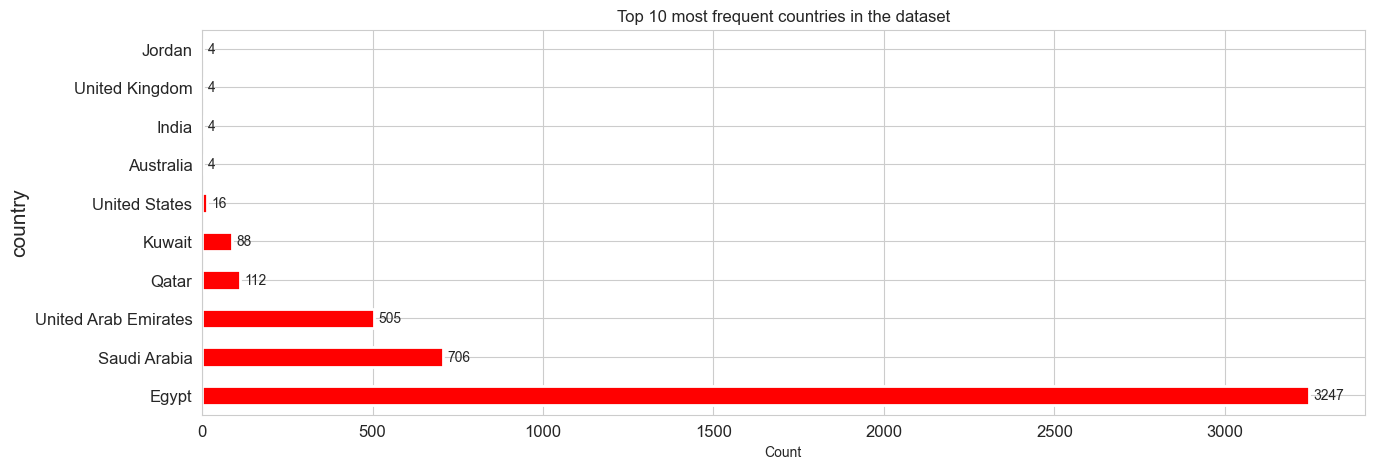

In [145]:
# the most popular  countries in the dataset
plot_bar(copy_df,'country','Top 10 most frequent countries in the dataset')

we will focus on Egypt , Saudi Arabia , UAE in our analysis

In [162]:
countries=['Egypt' , 'Saudi Arabia','United Arab Emirates' ]

In [32]:
counts(copy_df,'job_category')

job_category
Other                        814
Management and Leadership    730
Design and Creative          454
Sales and Marketing          332
Software Engineering         291
Finance and Accounting       246
Administrative               241
Data Entry                   230
IT Professional              216
AI and Machine Learning      195
Name: count, dtype: int64

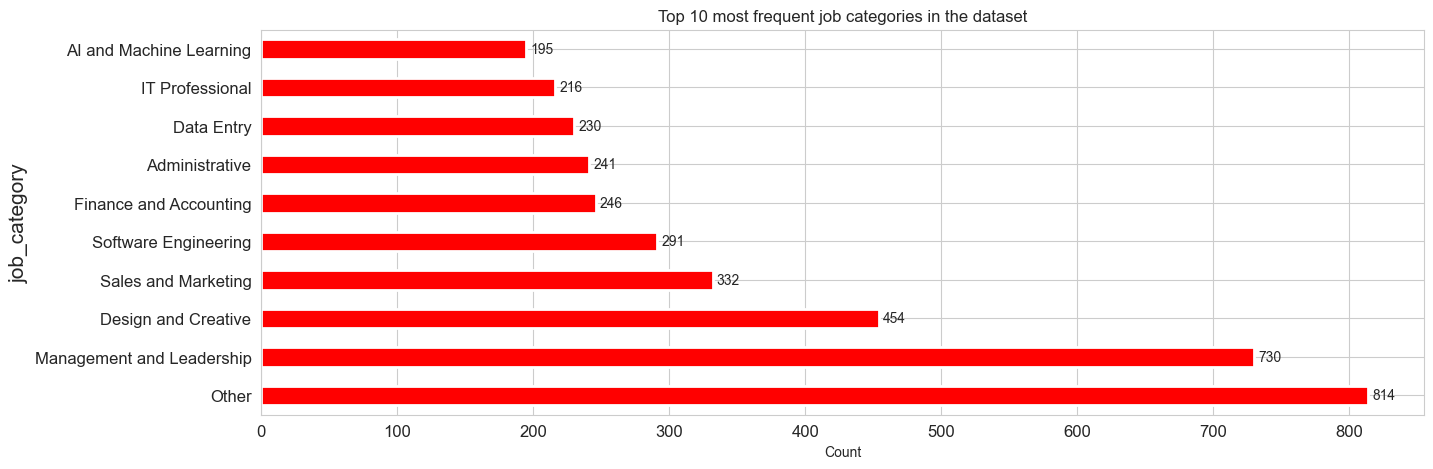

In [146]:
#What are the most common job categories in the data
plot_bar(copy_df,'job_category','Top 10 most frequent job categories in the dataset')

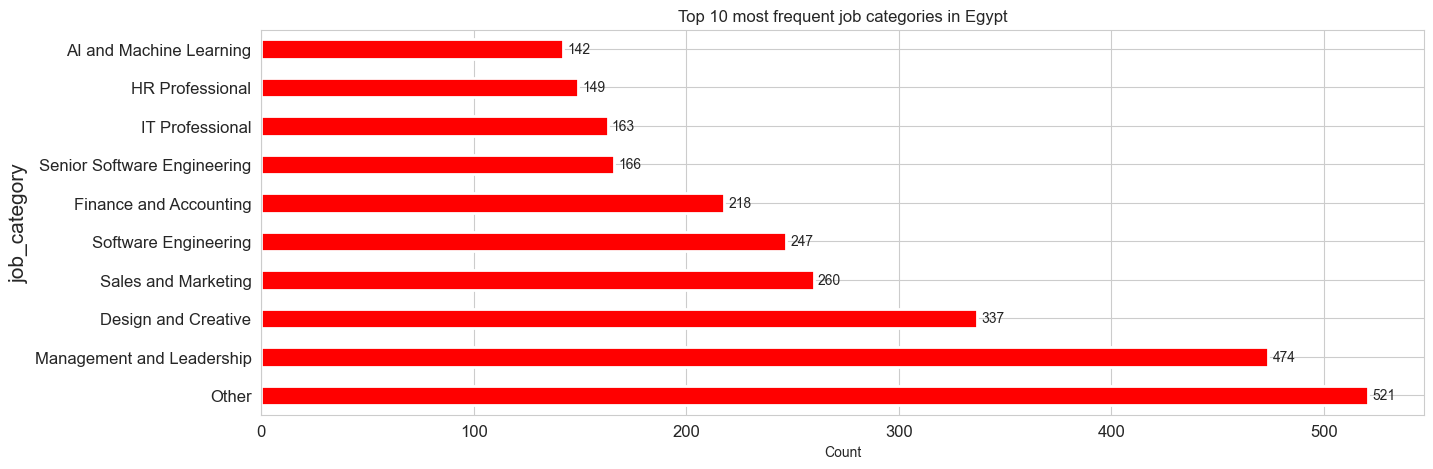

In [147]:
#What are the most common job categories in the Egypt
plot_bar(copy_df.groupby('country').get_group(countries[0])
         ,'job_category',f'Top 10 most frequent job categories in {countries[0]}')

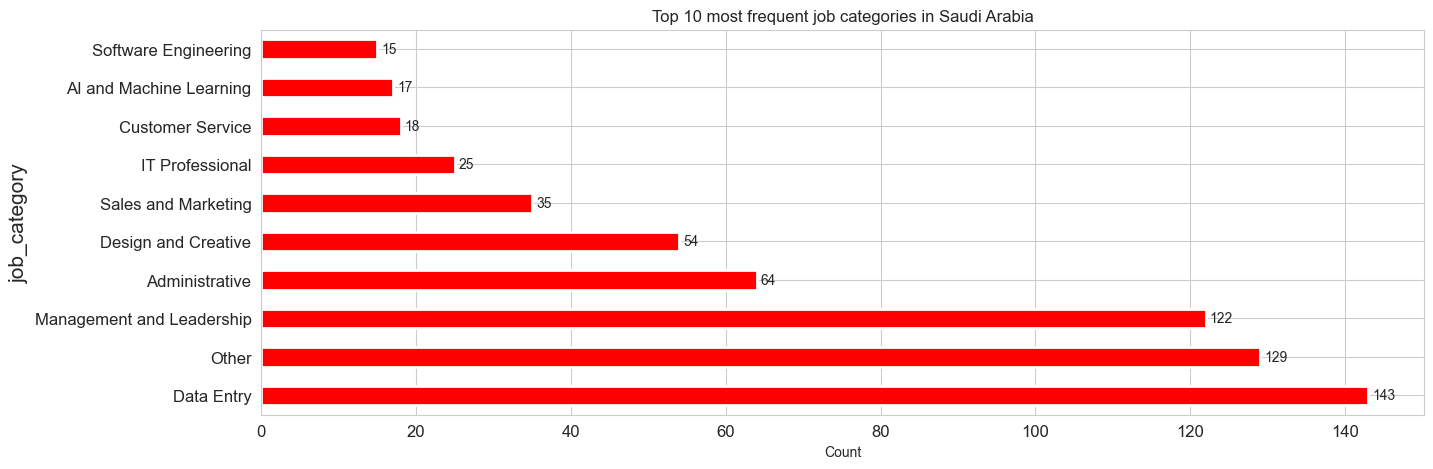

In [148]:
plot_bar(copy_df.groupby('country').get_group('Saudi Arabia')
         ,'job_category',f'Top 10 most frequent job categories in {countries[1]}')

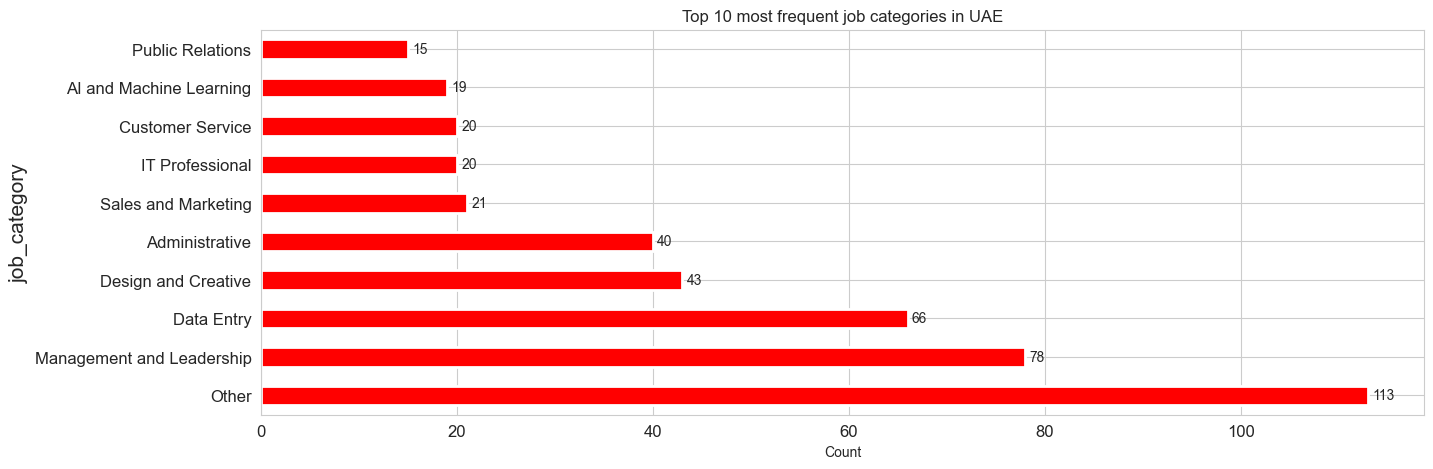

In [149]:
plot_bar(copy_df.groupby('country').get_group('United Arab Emirates')
         ,'job_category','Top 10 most frequent job categories in UAE')

In [34]:
#Which companies are hiring the most?
counts(copy_df,'company_name')

company_name
Confidential                       466
Teleperformance                     34
Outservingplus                      28
GE-V                                23
NOK for Human Capital Solutions     22
Envirogent                          21
Intoude Foundation Too              20
scandiweb                           18
Virtusa                             18
Steady State Sports                 18
Name: count, dtype: int64

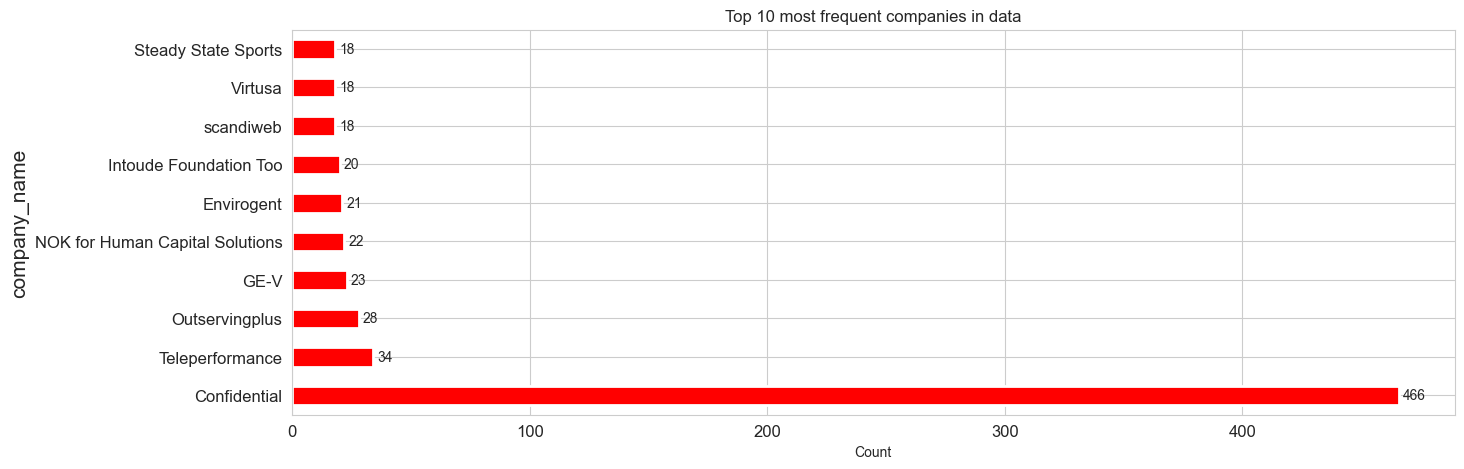

In [150]:
plot_bar(copy_df,'company_name','Top 10 most frequent companies in data')

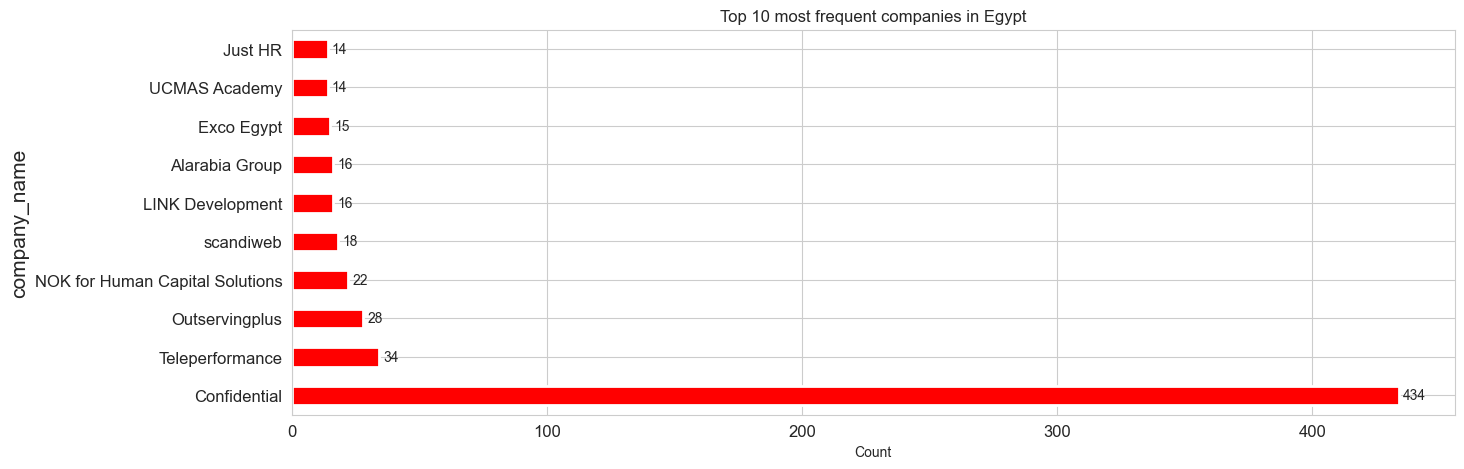

In [151]:
plot_bar(copy_df.groupby('country').get_group('Egypt')
         ,'company_name','Top 10 most frequent companies in Egypt')

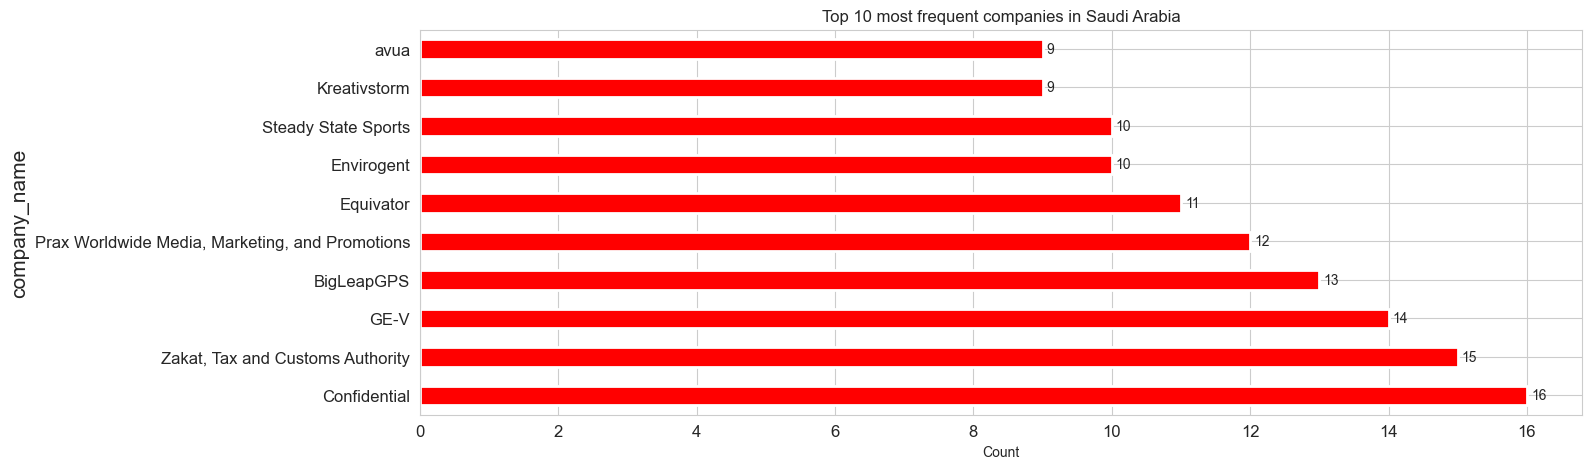

In [152]:
plot_bar(copy_df.groupby('country').get_group('Saudi Arabia')
         ,'company_name','Top 10 most frequent companies in Saudi Arabia')

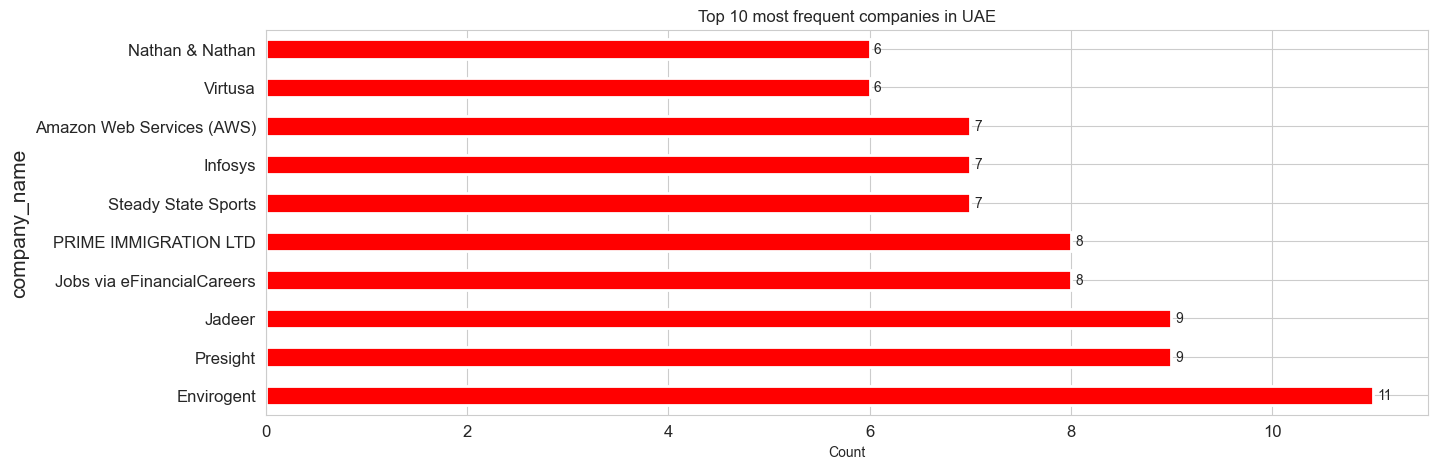

In [153]:
plot_bar(copy_df.groupby('country').get_group('United Arab Emirates')
         ,'company_name','Top 10 most frequent companies in UAE')

In [116]:
# num of available jobs in each city in Egypt
egy_data=copy_df[copy_df['country']=='Egypt']
jobs=egy_data.groupby('city')['company_name'].apply('count').sort_values(ascending=False).head()

most of jobs available in Cairo and Giza ,it is normal

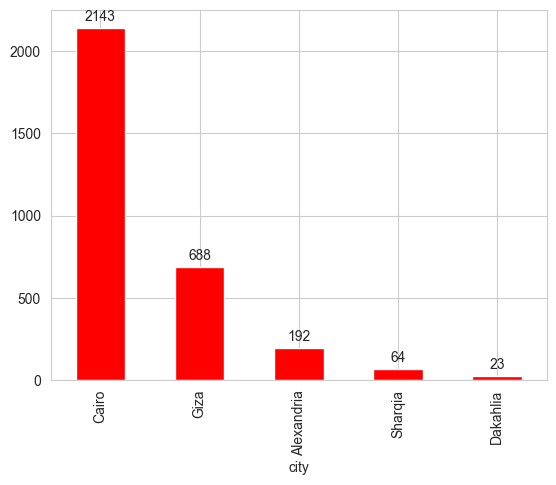

In [112]:
ax=jobs.plot(kind='bar',color='red')
for cont in ax.containers:
        ax.bar_label(cont,label_type='edge',padding=3)

In [175]:
sauid_data=copy_df[copy_df['country']==countries[1]]
jobs=sauid_data.groupby('city')['company_name'].apply('count').sort_values(ascending=False).head()

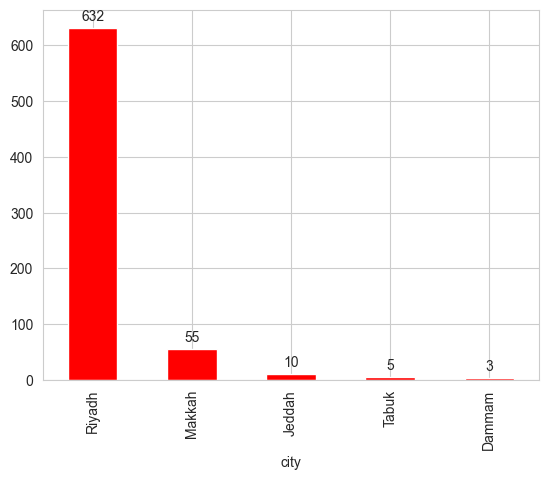

In [176]:
#num of available jobs in each city in Saudi Arabia
ax=jobs.plot(kind='bar',color='red')
for cont in ax.containers:
        ax.bar_label(cont,label_type='edge',padding=3)

In [177]:
uae_data=copy_df[copy_df['country']==countries[2]]
jobs=uae_data.groupby('city')['company_name'].apply('count').sort_values(ascending=False).head()

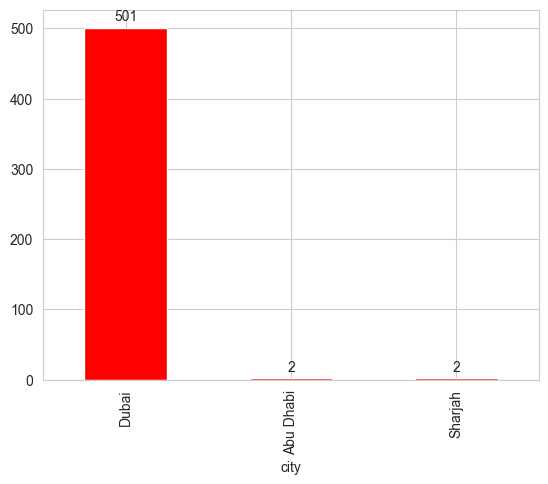

In [178]:
#num of available jobs in each city in UAE
ax=jobs.plot(kind='bar',color='red')
for cont in ax.containers:
        ax.bar_label(cont,label_type='edge',padding=3)

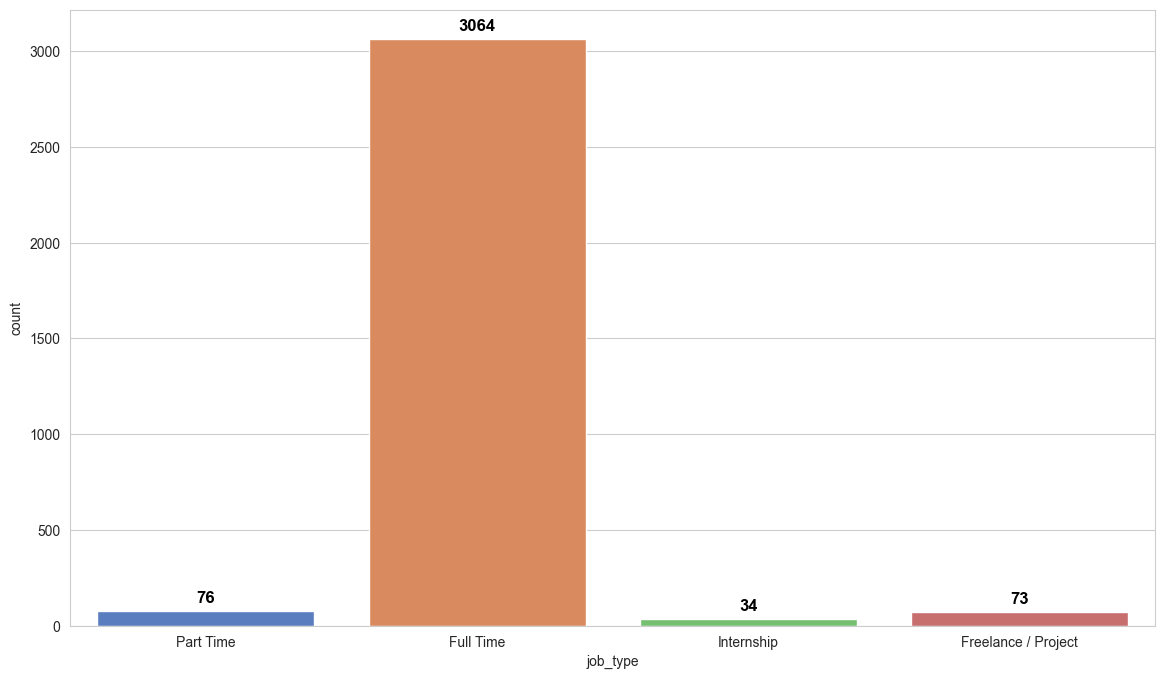

In [163]:
#What is the distribution of job types in Egypt?
count_plot(copy_df.groupby('country').get_group(countries[0]),'job_type')

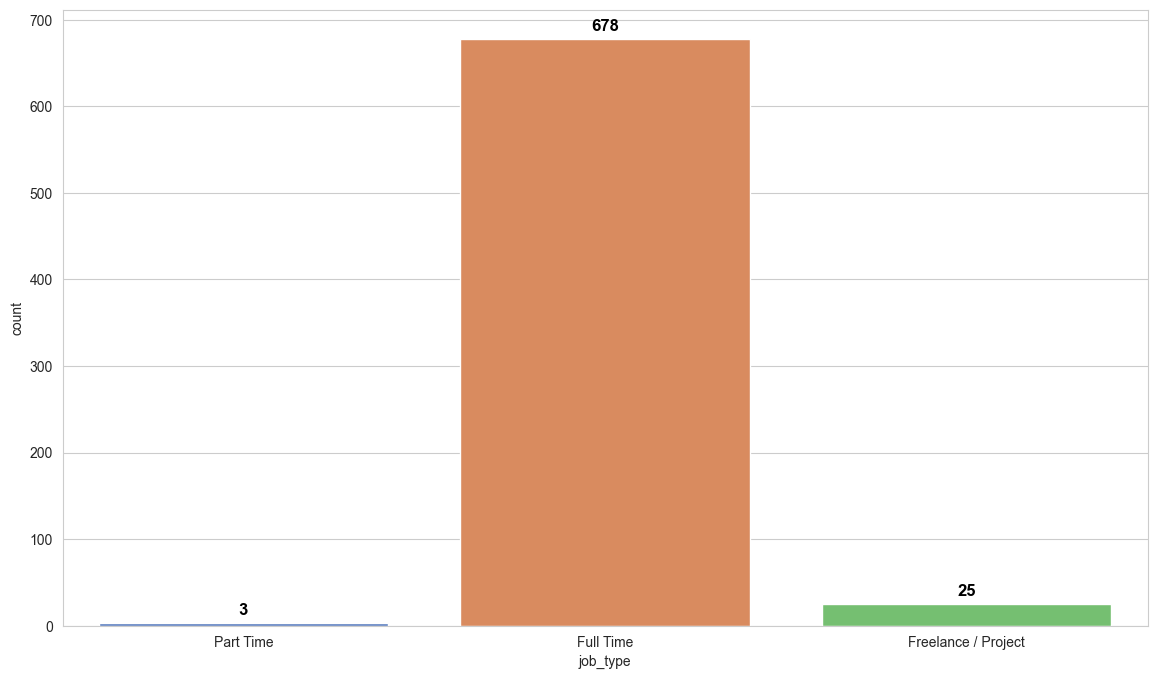

In [164]:
#What is the distribution of job types in Saudi Arabia?
count_plot(copy_df.groupby('country').get_group(countries[1]),'job_type')

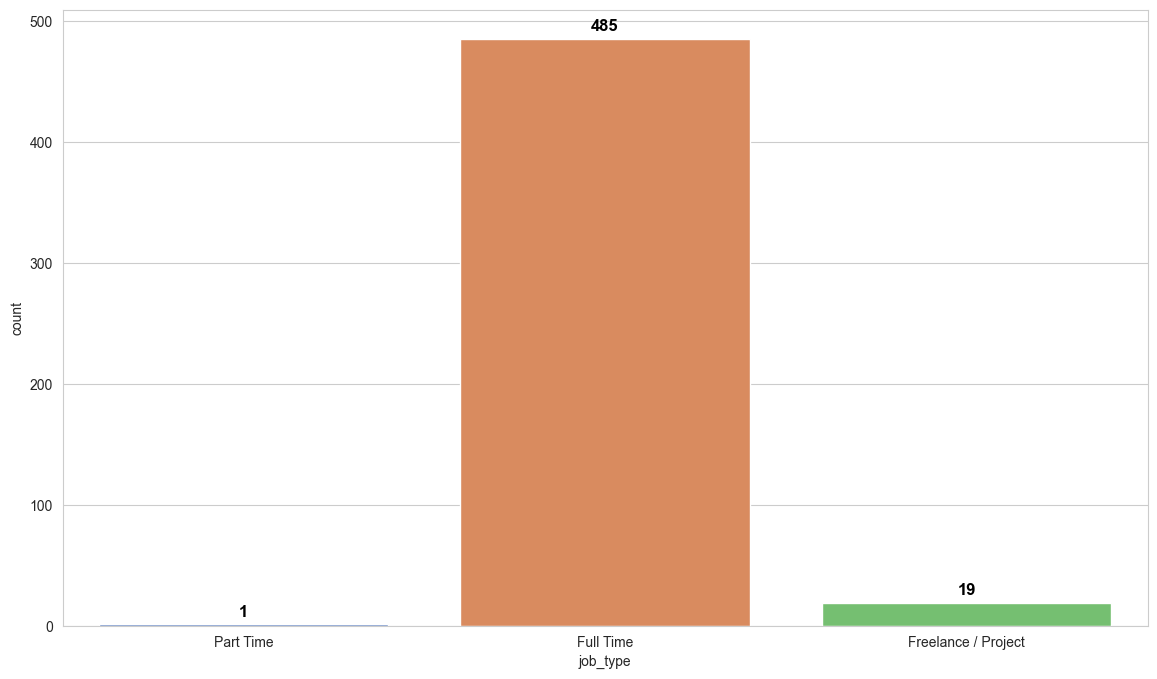

In [165]:
#What is the distribution of job types in UAE?
count_plot(copy_df.groupby('country').get_group(countries[2]),'job_type')

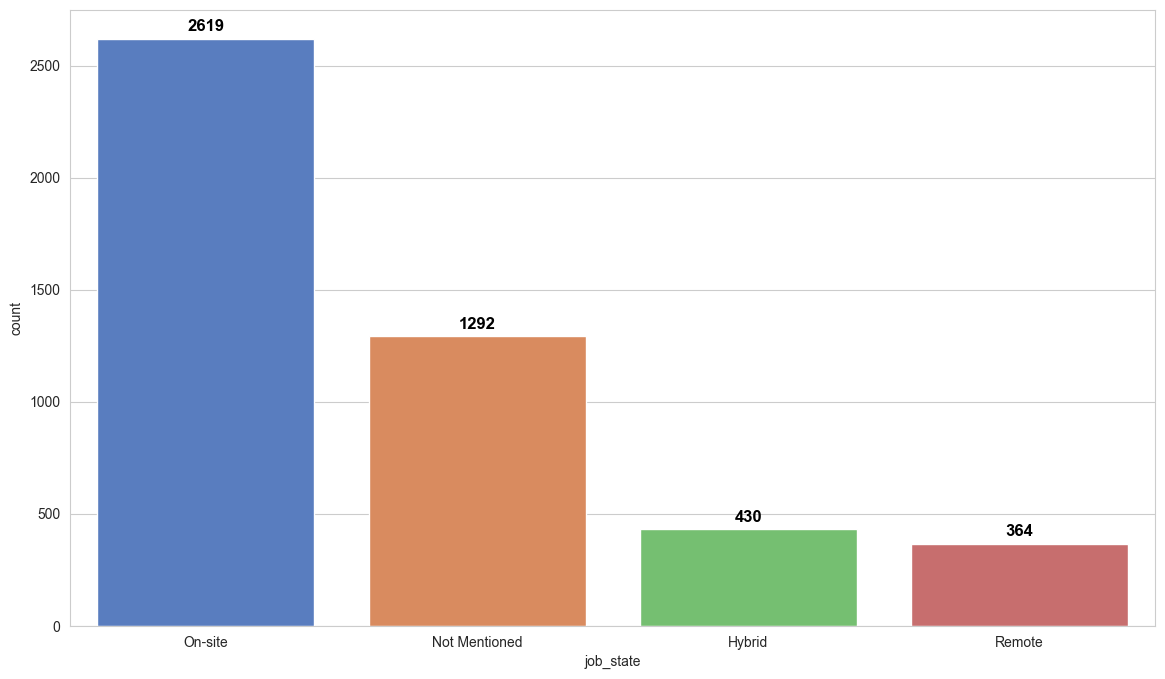

In [169]:
count_plot(copy_df,'job_state')

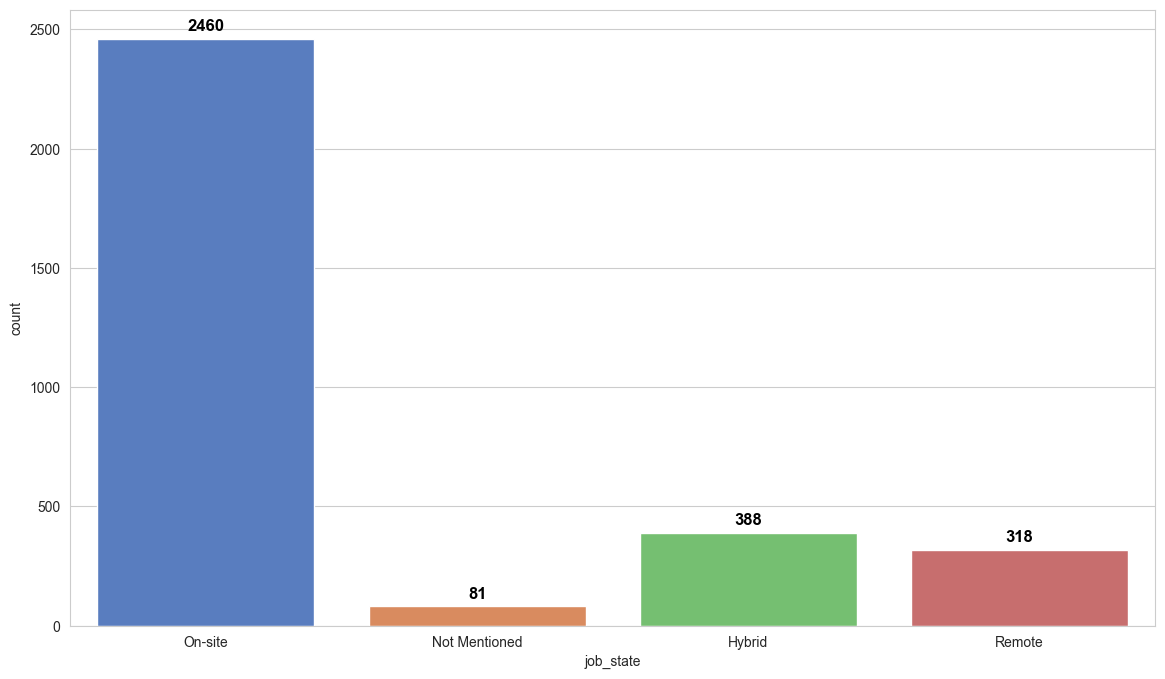

In [166]:
#distribution of job states in egypt
count_plot(copy_df.groupby('country').get_group(countries[0]),'job_state')

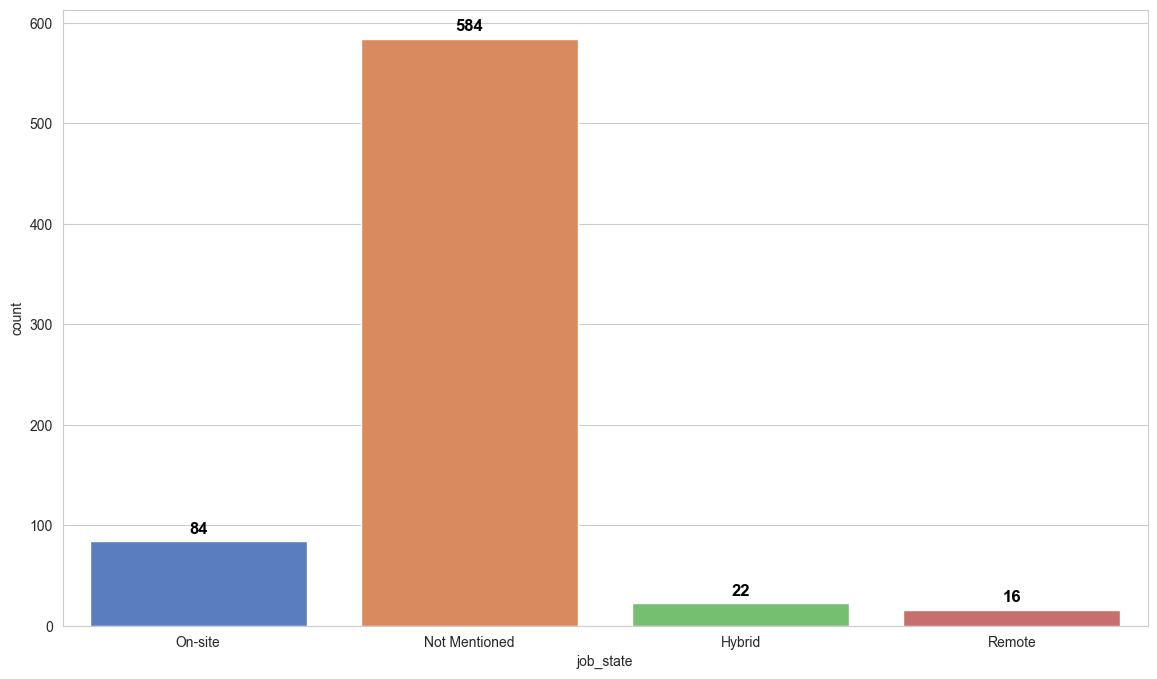

In [167]:
#distribution of job states in Saudi Arabia
count_plot(copy_df.groupby('country').get_group(countries[1]),'job_state')

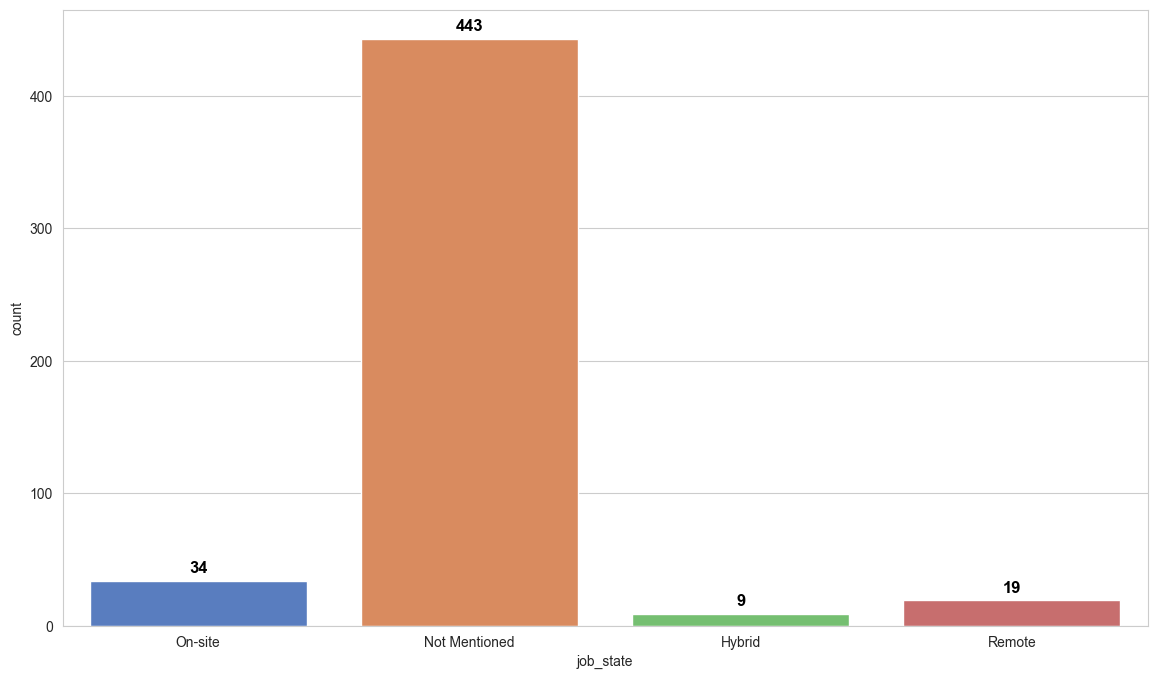

In [168]:
#distribution of job states in UAE
count_plot(copy_df.groupby('country').get_group(countries[2]),'job_state')

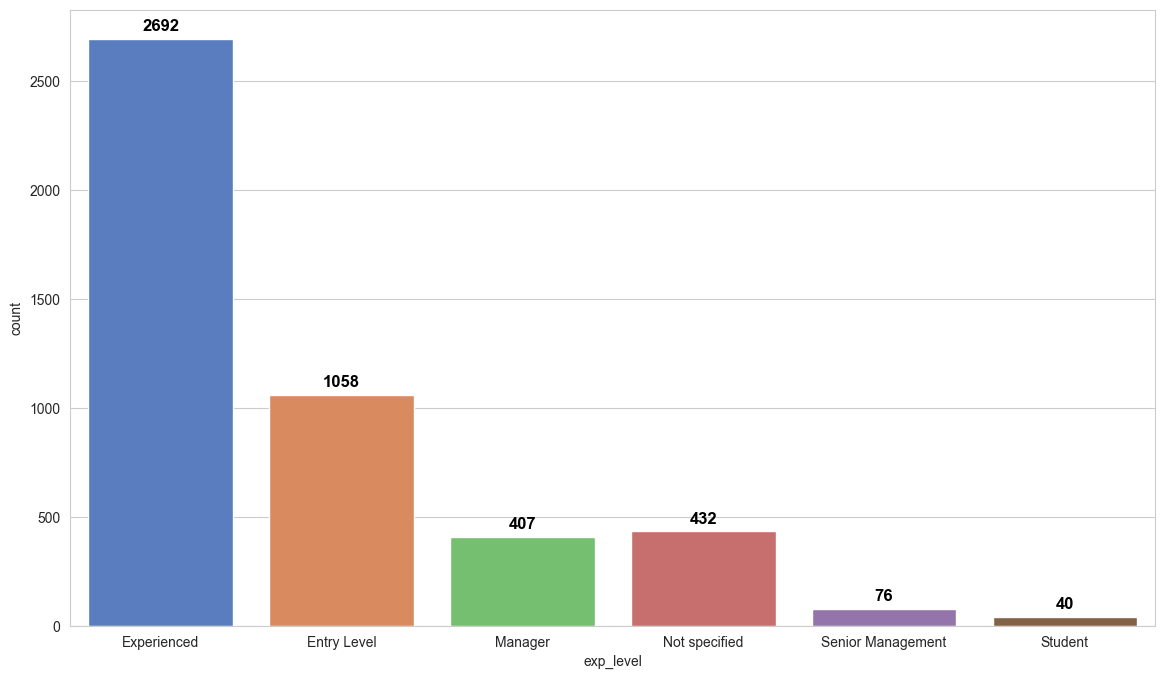

In [159]:
#distribution of job states in all countries
count_plot(copy_df,'exp_level')

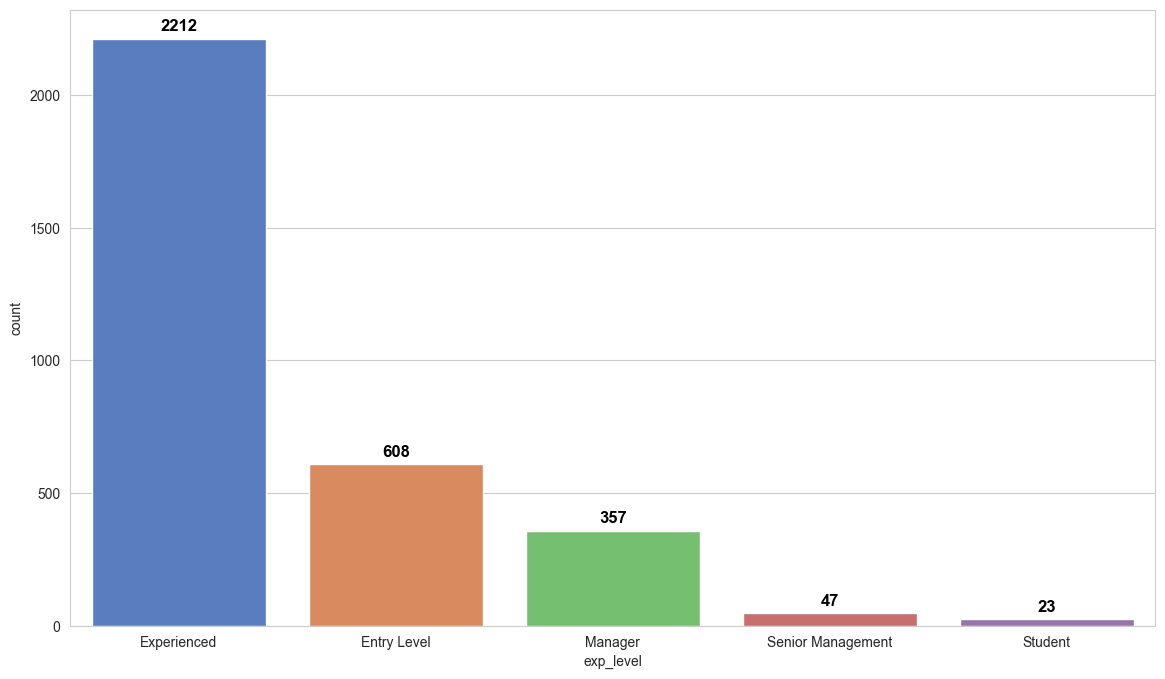

In [170]:
#distribution of job states in Egypt
count_plot(copy_df.groupby('country').get_group(countries[0]),'exp_level')

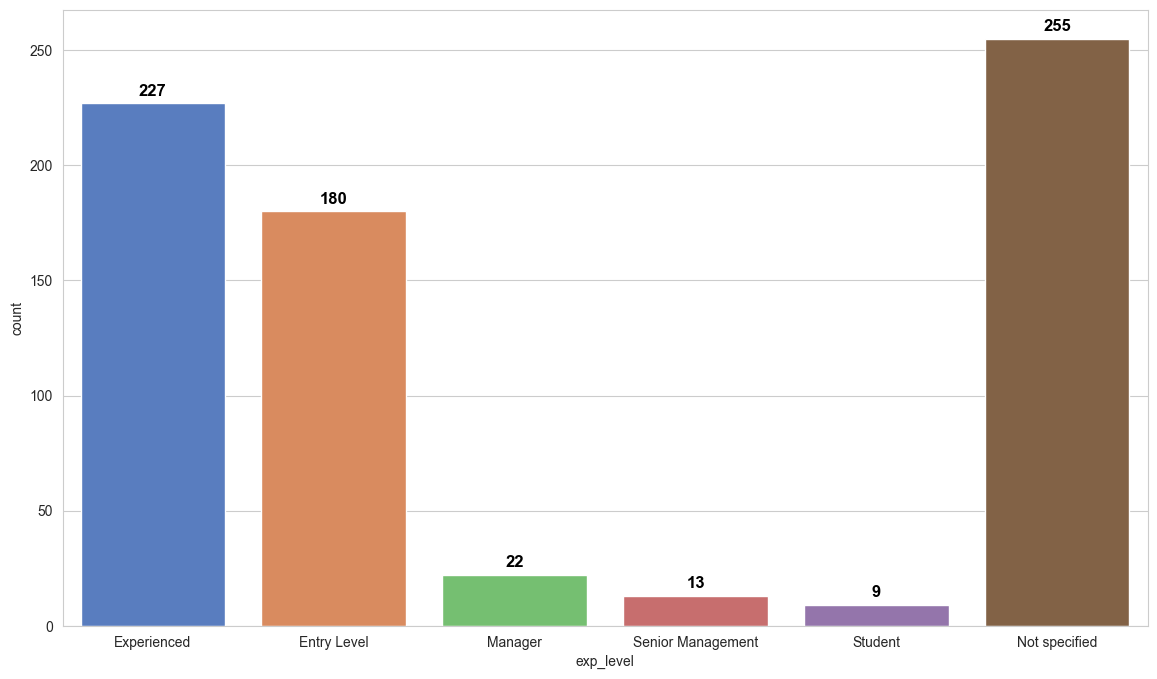

In [171]:
#distribution of job states in Saudi Arabia
count_plot(copy_df.groupby('country').get_group(countries[1]),'exp_level')

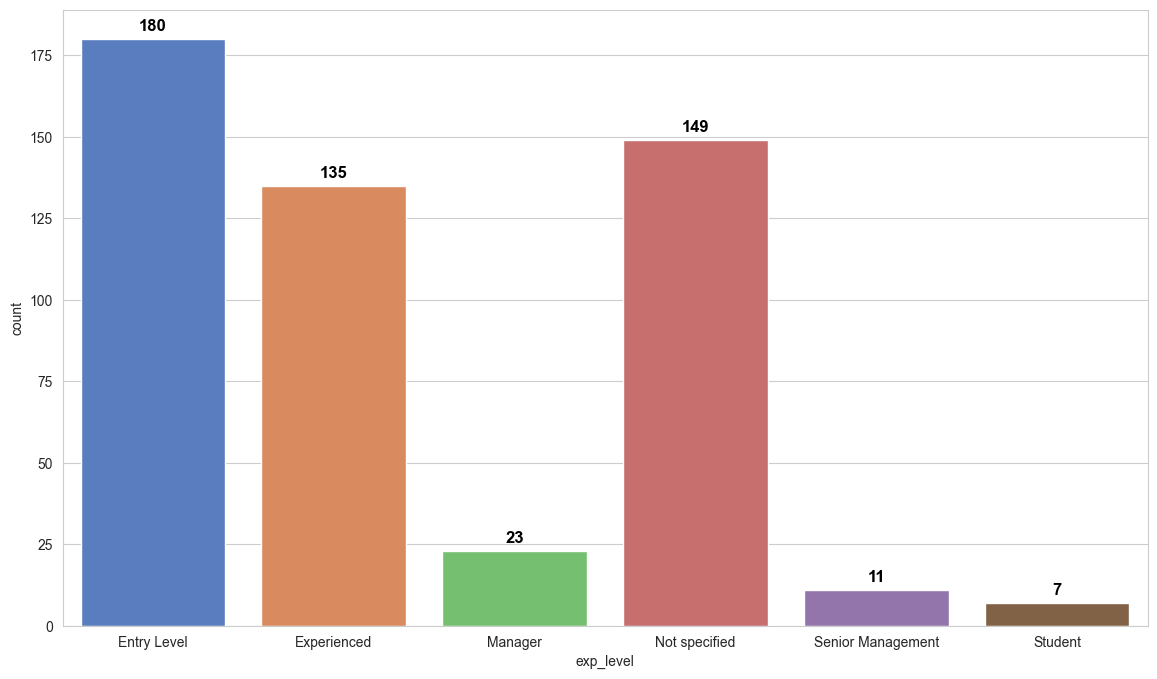

In [172]:
#distribution of job states in UAE
count_plot(copy_df.groupby('country').get_group(countries[2]),'exp_level')

In [179]:
copy_df.head()

,company_name,area,city,country,job_type,job_state,exp_level,job_category,programming_languages,frameworks,Number of Experience Year,posting_date
0,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['python', 'r']",not found,9.0,2024-07-23
1,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['python', 'r']","['pytorch', 'tensorflow']",9.0,2024-07-17
2,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['python', 'r']",not found,3.0,2024-07-03
3,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['java', 'r', 'java']",not found,6.0,2024-06-03
4,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,"['python', 'r']","['pytorch', 'tensorflow']",4.0,2024-08-02


In [186]:
copy_df['Number of Experience Year']=copy_df['Number of Experience Year'].astype(int)

<Axes: xlabel='Number of Experience Year', ylabel='Count'>

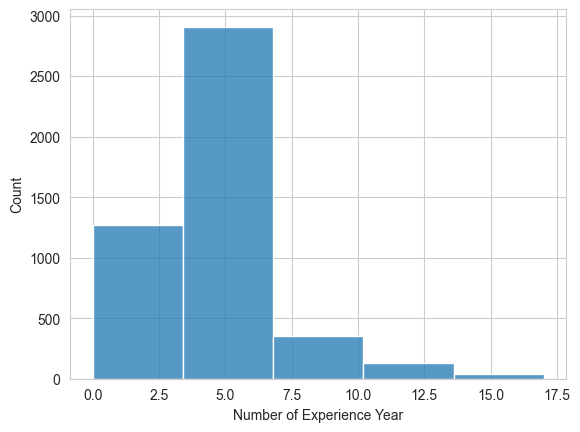

In [227]:
sns.histplot(copy_df['Number of Experience Year'],palette=palette,bins=5)

In [200]:
copy_df['Number of Experience Year'].agg(['min','max','mean','median','std'])

min        0.000000
max       17.000000
mean       4.272901
median     4.000000
std        2.335834
Name: Number of Experience Year, dtype: float64

In [218]:
def bar(data,x,y):
    plt.figure(figsize=(14, 8))
    ax=sns.barplot(x=data[x],y=data[y],palette=palette)
    ax.set_xlabel(f'{x} of years exp')
    return ax

In [208]:
# How do the required years of experience vary by job category?
pop_statis=round(copy_df.groupby('job_category')['Number of Experience Year'].agg(['min','max','mean','median','std'])\
      .sort_values(by='mean',ascending=False),0)
pop_statis=pop_statis.reset_index()

<Axes: xlabel='mean of years exp', ylabel='job_category'>

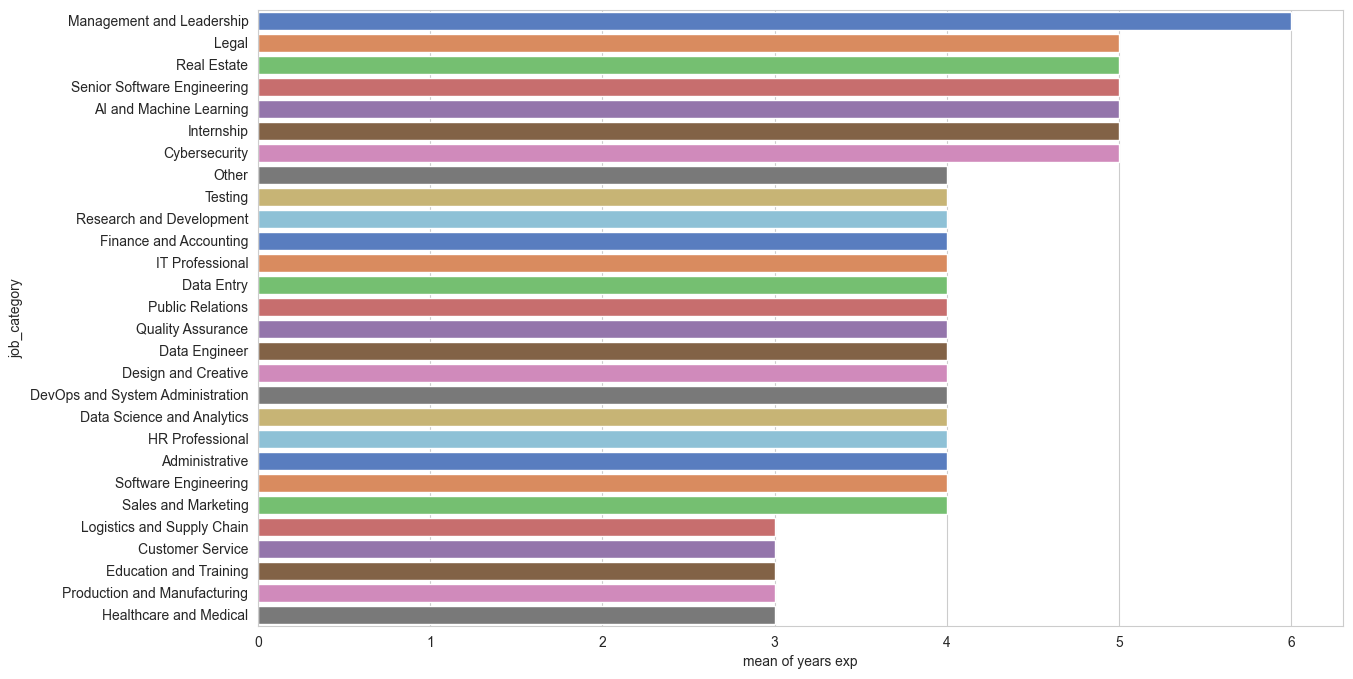

In [219]:
bar(pop_statis,'mean','job_category')

In [216]:
# Egypt years of experience for each job category
egy_stats=round(egy_data.groupby('job_category')['Number of Experience Year'].agg(['min','max','mean','median','std'])\
      .sort_values(by='mean',ascending=False),0).reset_index()

<Axes: xlabel='mean of years exp', ylabel='job_category'>

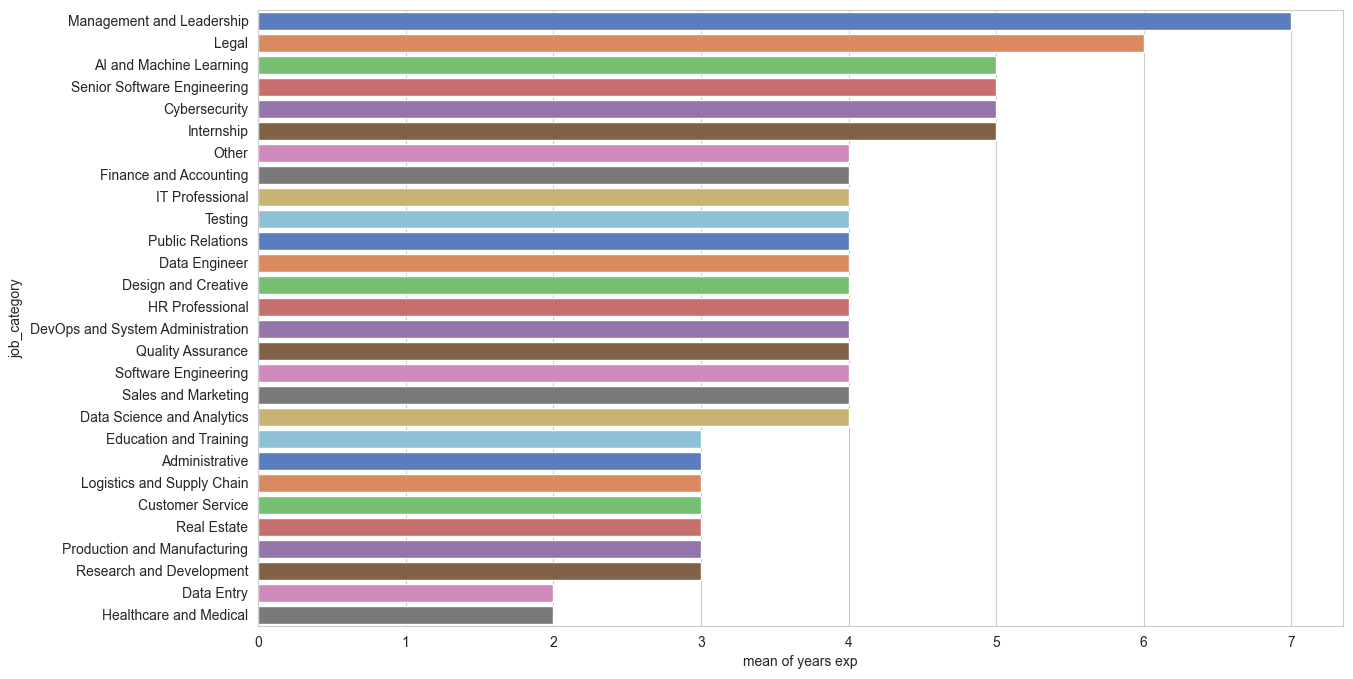

In [220]:
bar(egy_stats,'mean','job_category')

In [221]:
#Saudi Arabia years of experience for each job category
sauid_stats=round(sauid_data.groupby('job_category')['Number of Experience Year'].agg(['min','max','mean','median','std'])\
      .sort_values(by='mean',ascending=False),0).reset_index()

<Axes: xlabel='mean of years exp', ylabel='job_category'>

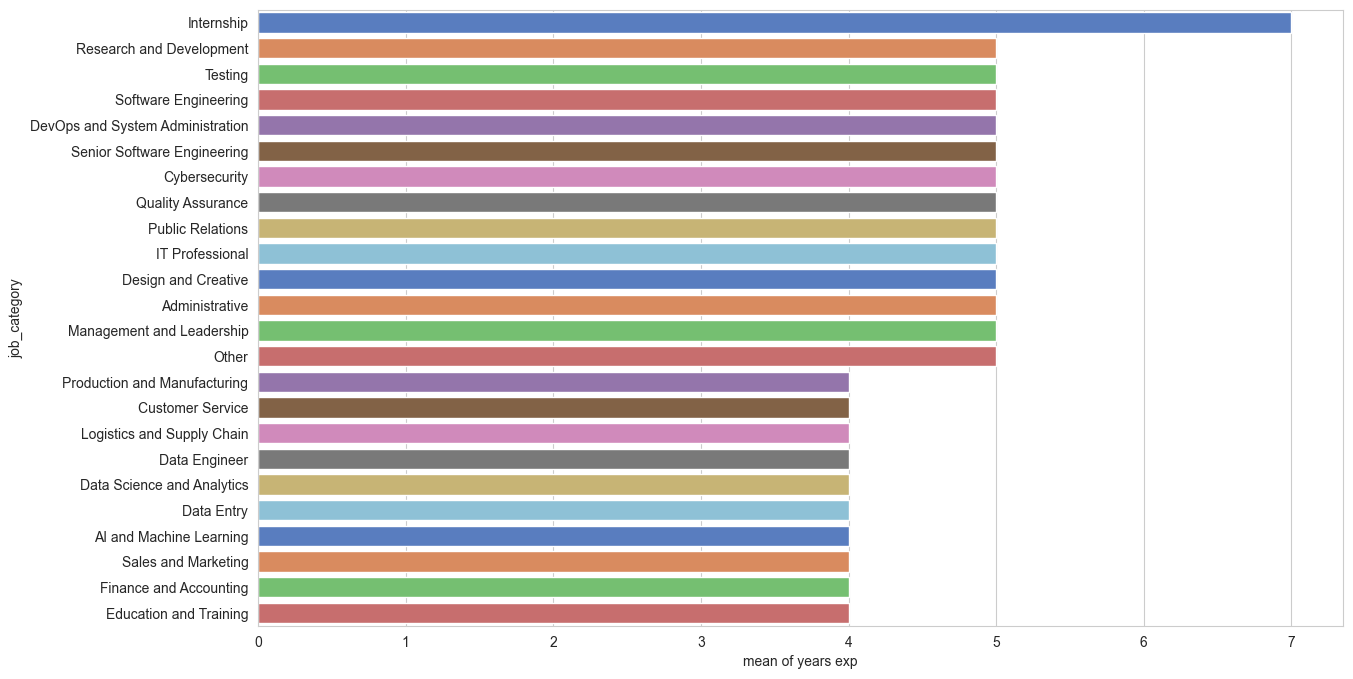

In [222]:
bar(sauid_stats,'mean','job_category')

In [223]:
uae_stats=round(uae_data.groupby('job_category')['Number of Experience Year'].agg(['min','max','mean','median','std'])\
      .sort_values(by='mean',ascending=False),0).reset_index()

<Axes: xlabel='mean of years exp', ylabel='job_category'>

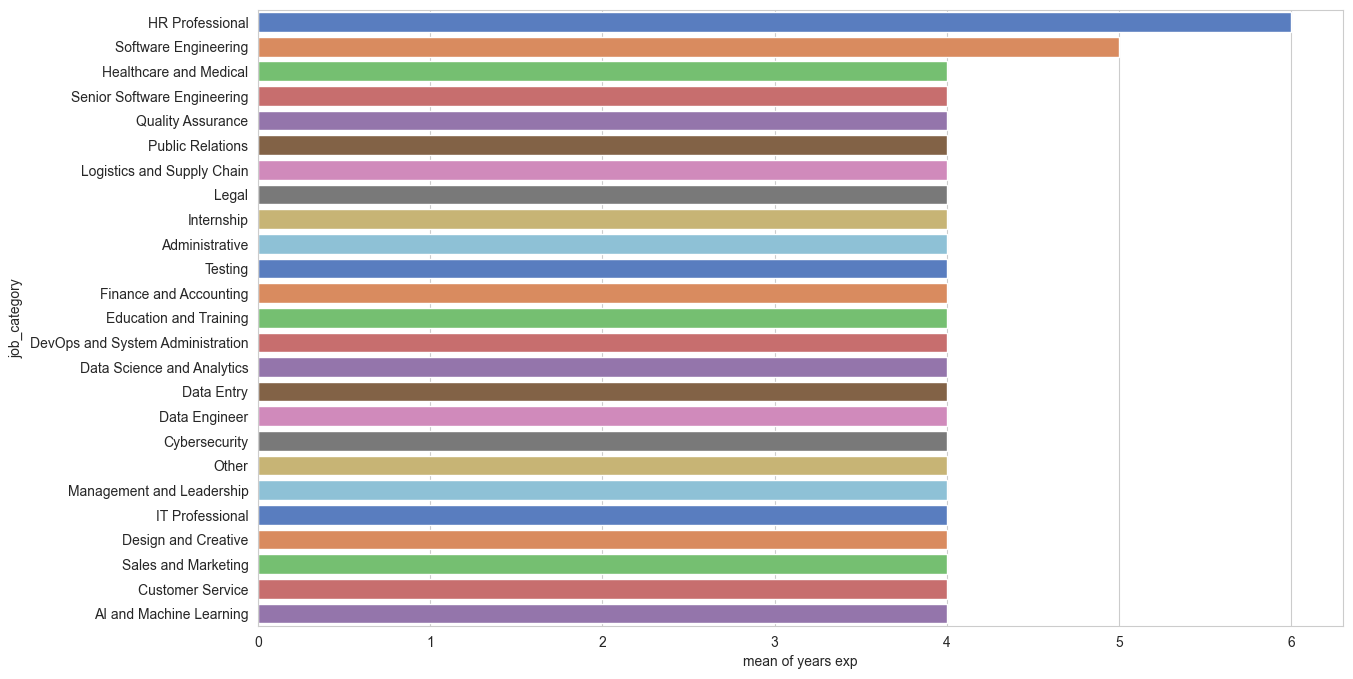

In [225]:
bar(uae_stats,'mean','job_category')

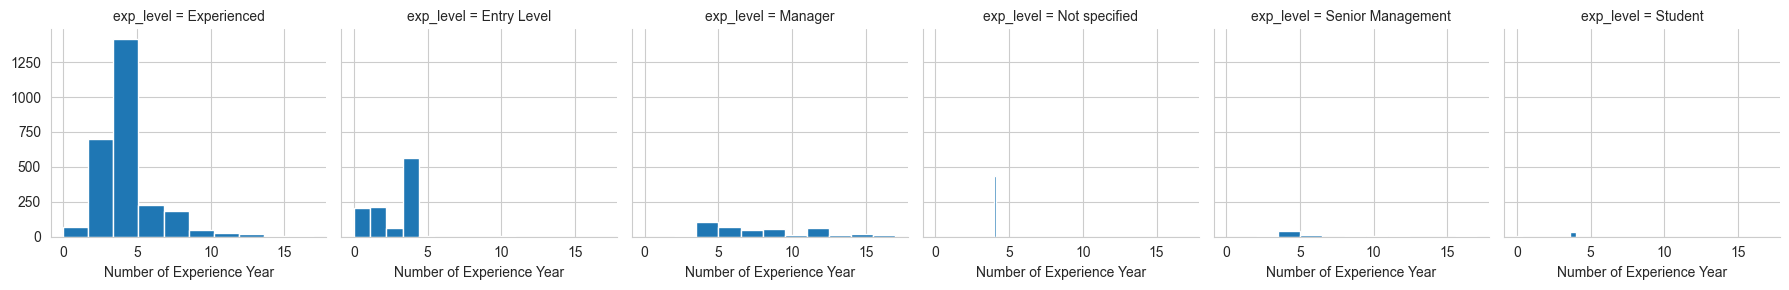

In [229]:
g=sns.FacetGrid(copy_df,col='exp_level')
g=g.map(plt.hist,'Number of Experience Year')

In [237]:
copy_df['programming_languages']

0             ['python', 'r']
1             ['python', 'r']
2             ['python', 'r']
3       ['java', 'r', 'java']
4             ['python', 'r']
                ...          
5186                    ['r']
5187                    ['r']
5188                    ['r']
5190                    ['r']
5192                    ['r']
Name: programming_languages, Length: 4705, dtype: object

In [ ]:
! pip install as

In [248]:
import ast
def safe_literal_eval(val):
    try:
        # Convert string representation of list to actual list
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        # If there's an error, return an empty list
        return []
copy_df['programming_languages']=copy_df['programming_languages'].apply(safe_literal_eval)

Text(0.5, 0, 'Languages')

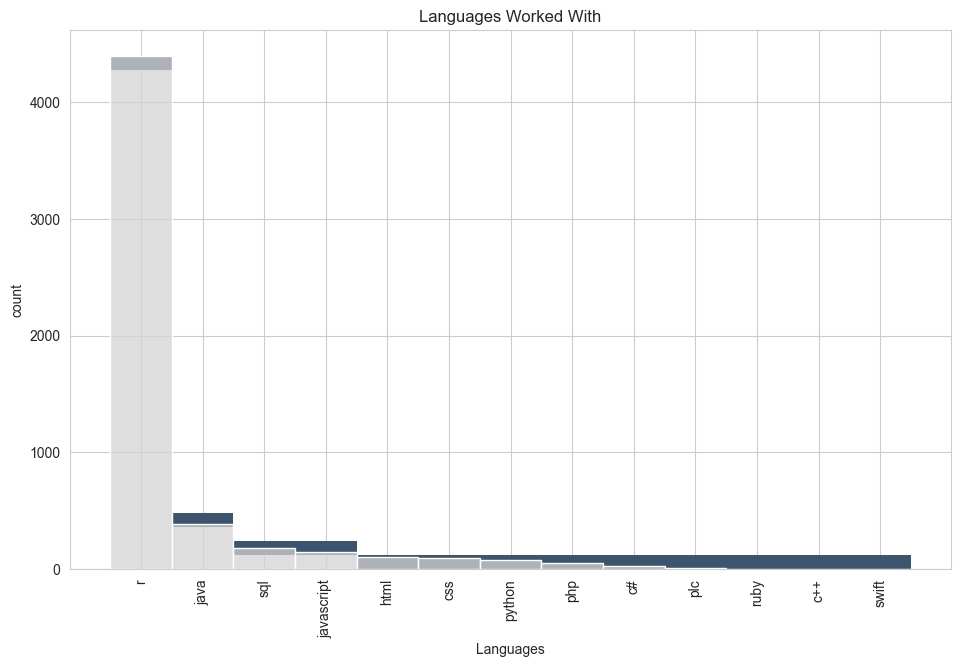

In [253]:
plt.figure(figsize=(25,7))

plt.subplot(1,2,1)

flat_list =[item for sublist in copy_df['programming_languages'] for item in sublist]
lang_df= pd.DataFrame({"LanguageHaveWorkedWith":flat_list})
value_c=lang_df["LanguageHaveWorkedWith"].value_counts().sort_values(ascending=False)
sns.histplot(data=value_c, x=value_c.keys(), y=value_c)
graph= sns.histplot(data=value_c, x=lang_df['LanguageHaveWorkedWith'], color="lightgrey")
plt.title("Languages Worked With")
plt.xticks(rotation=90)
plt.xlabel("Languages")

In [256]:
copy_df['frameworks']=copy_df['frameworks'].apply(safe_literal_eval)

Text(0.5, 0, 'frameworks')

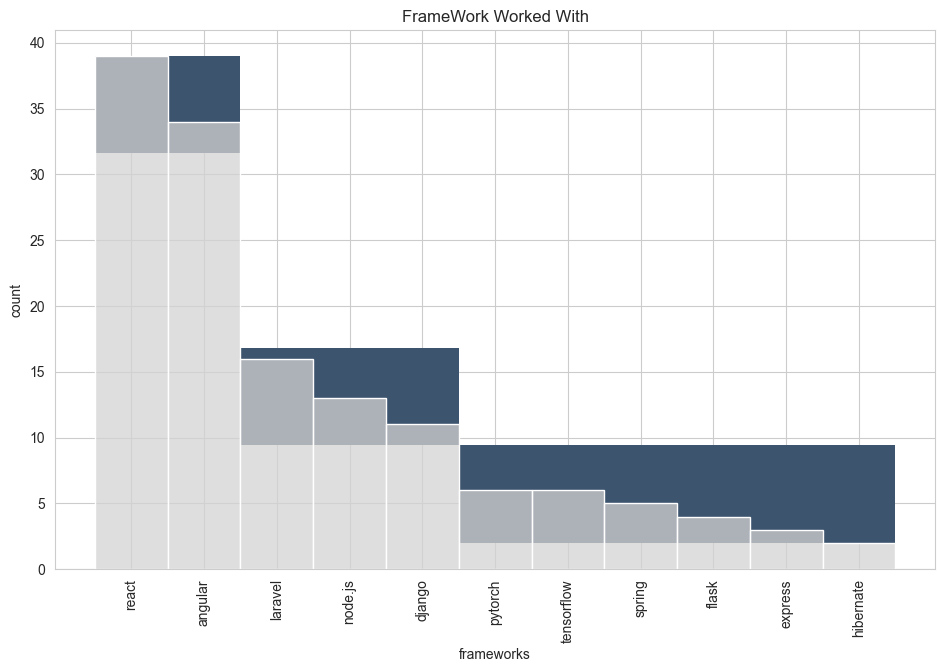

In [258]:
plt.figure(figsize=(25,7))

plt.subplot(1,2,1)

flat_list =[item for sublist in copy_df['frameworks'] for item in sublist]
frame_df= pd.DataFrame({"FrameWorkWorkedWith":flat_list})
value_c=frame_df["FrameWorkWorkedWith"].value_counts().sort_values(ascending=False)
sns.histplot(data=value_c, x=value_c.keys(), y=value_c)
graph= sns.histplot(data=value_c, x=frame_df['FrameWorkWorkedWith'], color="lightgrey")
plt.title("FrameWork Worked With")
plt.xticks(rotation=90)
plt.xlabel("frameworks")

<Axes: xlabel='posting_date'>

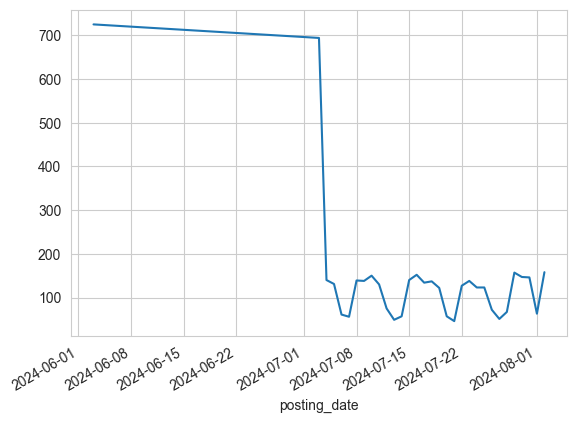

In [261]:
copy_df['posting_date'].value_counts().plot()

num of jobs decreased at start of july